In [1]:
import ROOT, time
ROOT.gROOT.ProcessLine("gErrorIgnoreLevel = 3001;"); # suppress ROOT messages
# ROOT.enableJSVis()
ROOT.disableJSVis()
ROOT.gStyle.SetOptStat(0)

Welcome to JupyROOT 6.08/06


In [2]:
f = ROOT.TFile("~/project/lat/latSkimDS3_0_0.root")
theCut = f.Get("theCut").GetTitle()
bg = ROOT.TChain("skimTree"); bg.Add("~/project/lat/latSkimDS3*.root")
cal = ROOT.TChain("skimTree"); cal.Add("~/project/cal-lat/latSkimDS3*.root")
Ext = ROOT.TChain("mjdTree"); Ext.Add("~/project/ForceTrigger/lat_run72*.root")
# FT = ROOT.TChain("skimTree"); FT.Add("~/project/ForceTrigger/latSkimDS1_run99*.root")
FT = ROOT.TChain("mjdTree"); FT.Add("~/project/ForceTrigger/lat_run4201.root") 

line99 = ROOT.TLine()
line99.SetLineColor(ROOT.kGreen)
line95 = ROOT.TLine()
line95.SetLineColor(ROOT.kMagenta)

18.7875380516 seconds


Error in cling::AutoloadingVisitor::InsertIntoAutoloadingState:
   Missing FileEntry for inc/TAMBranchInfo.h
   requested to autoload type TAMBranchInfo
Error in cling::AutoloadingVisitor::InsertIntoAutoloadingState:
   Missing FileEntry for inc/TAMObjBranchLoader.h
   requested to autoload type TAMVirtualBranchLoader
Error in cling::AutoloadingVisitor::InsertIntoAutoloadingState:
   Missing FileEntry for inc/TAMObjBranchLoader.h
   requested to autoload type TAMObjBranchLoader
Error in cling::AutoloadingVisitor::InsertIntoAutoloadingState:
   Missing FileEntry for inc/TAMObjLoader.h
   requested to autoload type TAMVirtualLoader
Error in cling::AutoloadingVisitor::InsertIntoAutoloadingState:
   Missing FileEntry for inc/TAMObjLoader.h
   requested to autoload type TAMObjLoader
Error in cling::AutoloadingVisitor::InsertIntoAutoloadingState:
   Missing FileEntry for inc/TAMOutput.h
   requested to autoload type TAMOutput
Error in cling::AutoloadingVisitor::InsertIntoAutoloadingState:
  

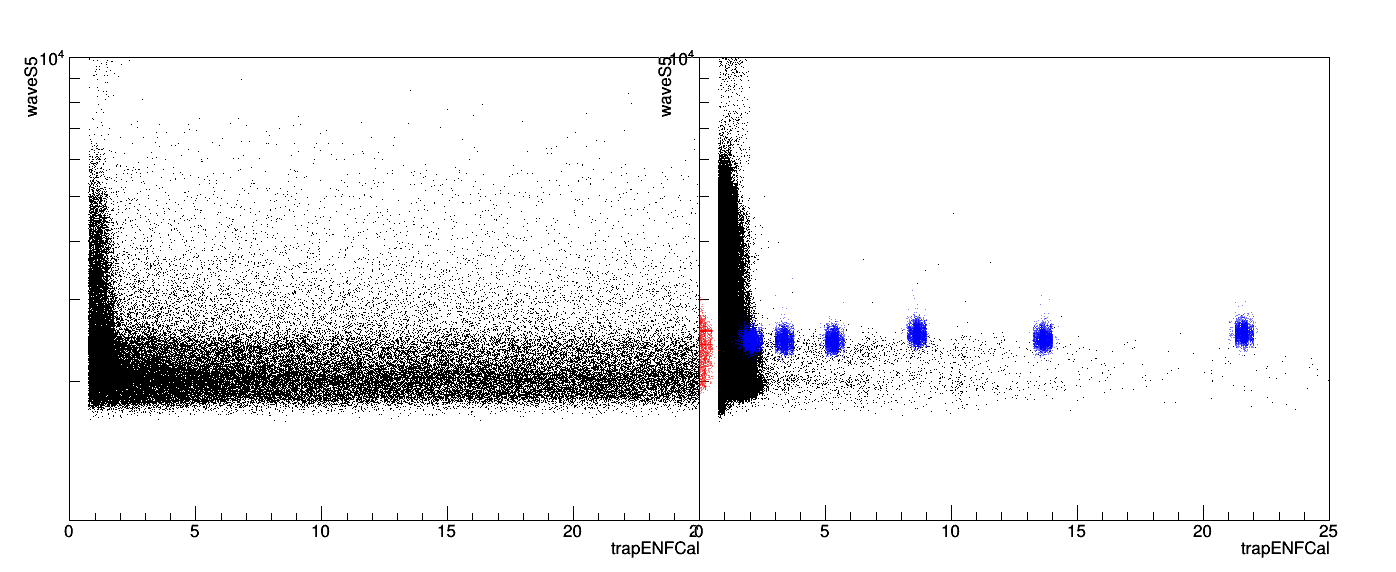

In [3]:
# Blue = External Pulser (DS0)
# Red = Force Trigger (DS1)

nP = 2
c1 = ROOT.TCanvas("c1","c1",nP*700,600); c1.Divide(nP,1,0)
st = time.time()
xBins, xBinL, xBinH = 100, 0, 25
yBins, yBinL, yBinH = 10000, 1000, 10000
xStr, yStr = 'trapENFCal', 'waveS5'
h1=ROOT.TH2D("h1","",xBins,xBinL,xBinH,yBins,yBinL,yBinH);cal.Project("h1",yStr+":"+xStr,theCut)
h2=ROOT.TH2D("h2","",xBins,xBinL,xBinH,yBins,yBinL,yBinH);bg.Project("h2",yStr+":"+xStr,theCut)
h3=ROOT.TH2D("h3","",xBins,xBinL,xBinH,yBins,yBinL,yBinH);FT.Project("h3",yStr+":"+xStr)
h4=ROOT.TH2D("h4","",xBins,xBinL,xBinH,yBins,yBinL,yBinH);Ext.Project("h4",yStr+":"+xStr,"channel == 624")
h1.GetXaxis().SetTitle(xStr); h1.GetYaxis().SetTitle(yStr)
h2.GetXaxis().SetTitle(xStr); h2.GetYaxis().SetTitle(yStr)
c1.cd(1);ROOT.gPad.SetLogy();h1.Draw()
c1.cd(2);ROOT.gPad.SetLogy();h2.Draw()
h3.SetMarkerColorAlpha(ROOT.kRed, 0.5); h3.Draw("SAME")
h4.SetMarkerColorAlpha(ROOT.kBlue, 0.5); h4.Draw("SAME")
c1.Draw()
print time.time() - st, "seconds"

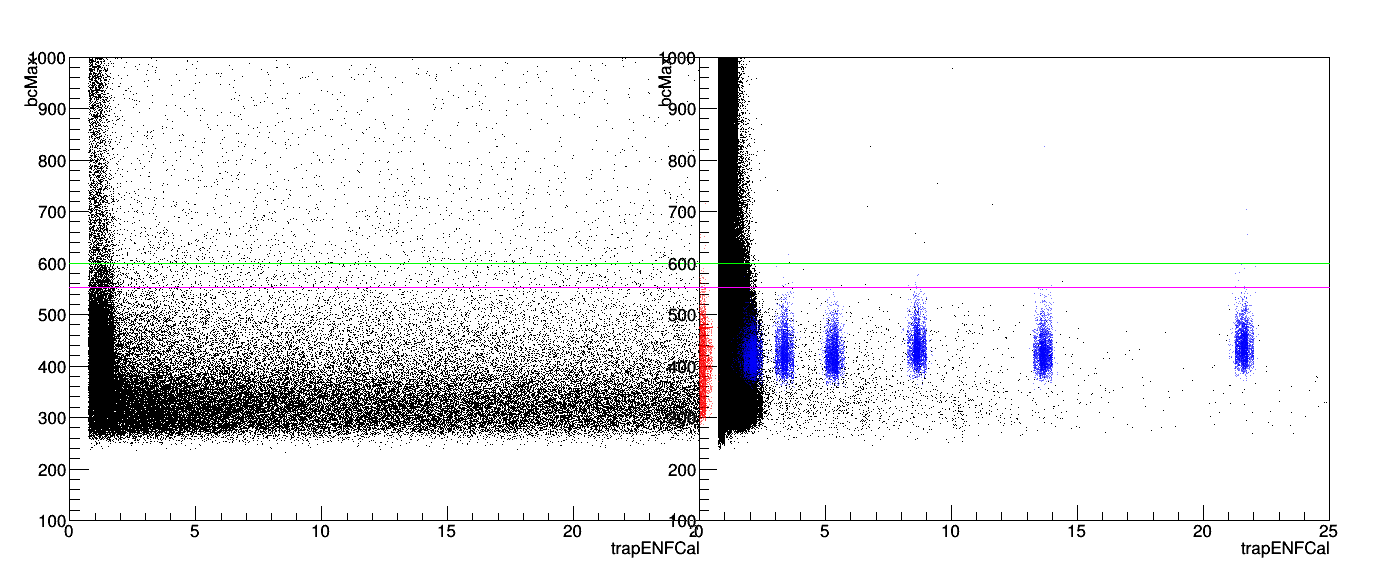

In [4]:
c1.cd(1); ROOT.gPad.SetLogy(0); c1.cd(2); ROOT.gPad.SetLogy(0)
xBins, xBinL, xBinH = 100, 0, 25
yBins, yBinL, yBinH = 10000, 100, 1000
xStr, yStr = 'trapENFCal', 'bcMax'
h1=ROOT.TH2D("h1","",xBins,xBinL,xBinH,yBins,yBinL,yBinH);cal.Project("h1",yStr+":"+xStr,theCut)
h2=ROOT.TH2D("h2","",xBins,xBinL,xBinH,yBins,yBinL,yBinH);bg.Project("h2",yStr+":"+xStr,theCut)
h3=ROOT.TH2D("h3","",xBins,xBinL,xBinH,yBins,yBinL,yBinH);FT.Project("h3",yStr+":"+xStr)
h4=ROOT.TH2D("h4","",xBins,xBinL,xBinH,yBins,yBinL,yBinH);Ext.Project("h4",yStr+":"+xStr,"channel == 624")
h1.GetXaxis().SetTitle(xStr); h1.GetYaxis().SetTitle(yStr)
h2.GetXaxis().SetTitle(xStr); h2.GetYaxis().SetTitle(yStr)
c1.cd(1); h1.Draw()
line99.DrawLine(xBinL, 599, xBinH, 599)
line95.DrawLine(xBinL, 553, xBinH, 553)
c1.cd(2); h2.Draw()
h3.SetMarkerColorAlpha(ROOT.kRed, 0.5); h3.Draw("SAME")
h4.SetMarkerColorAlpha(ROOT.kBlue, 0.5); h4.Draw("SAME")
line99.DrawLine(xBinL, 599, xBinH, 599)
line95.DrawLine(xBinL, 553, xBinH, 553)
c1.Draw()

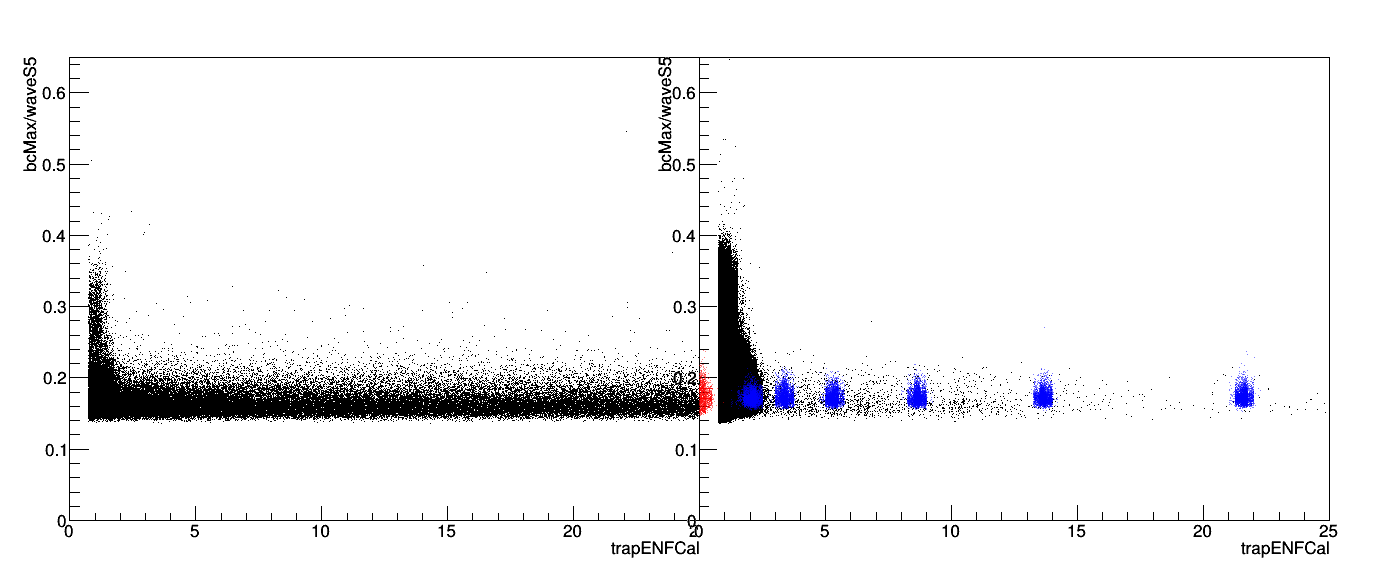

In [5]:
c1.cd(1); ROOT.gPad.SetLogy(0); c1.cd(2); ROOT.gPad.SetLogy(0)
xBins, xBinL, xBinH = 100, 0, 25
yBins, yBinL, yBinH = 10000, 0, 0.65
xStr, yStr = 'trapENFCal', 'bcMax/waveS5'
h1=ROOT.TH2D("h1","",xBins,xBinL,xBinH,yBins,yBinL,yBinH);cal.Project("h1",yStr+":"+xStr,theCut)
h2=ROOT.TH2D("h2","",xBins,xBinL,xBinH,yBins,yBinL,yBinH);bg.Project("h2",yStr+":"+xStr,theCut)
h3=ROOT.TH2D("h3","",xBins,xBinL,xBinH,yBins,yBinL,yBinH);FT.Project("h3",yStr+":"+xStr)
h4=ROOT.TH2D("h4","",xBins,xBinL,xBinH,yBins,yBinL,yBinH);Ext.Project("h4",yStr+":"+xStr,"channel == 624")
h1.GetXaxis().SetTitle(xStr); h1.GetYaxis().SetTitle(yStr)
h2.GetXaxis().SetTitle(xStr); h2.GetYaxis().SetTitle(yStr)
c1.cd(1); h1.Draw()
c1.cd(2); h2.Draw()
h3.SetMarkerColorAlpha(ROOT.kRed, 0.5); h3.Draw("SAME")
h4.SetMarkerColorAlpha(ROOT.kBlue, 0.5); h4.Draw("SAME")
c1.Draw()

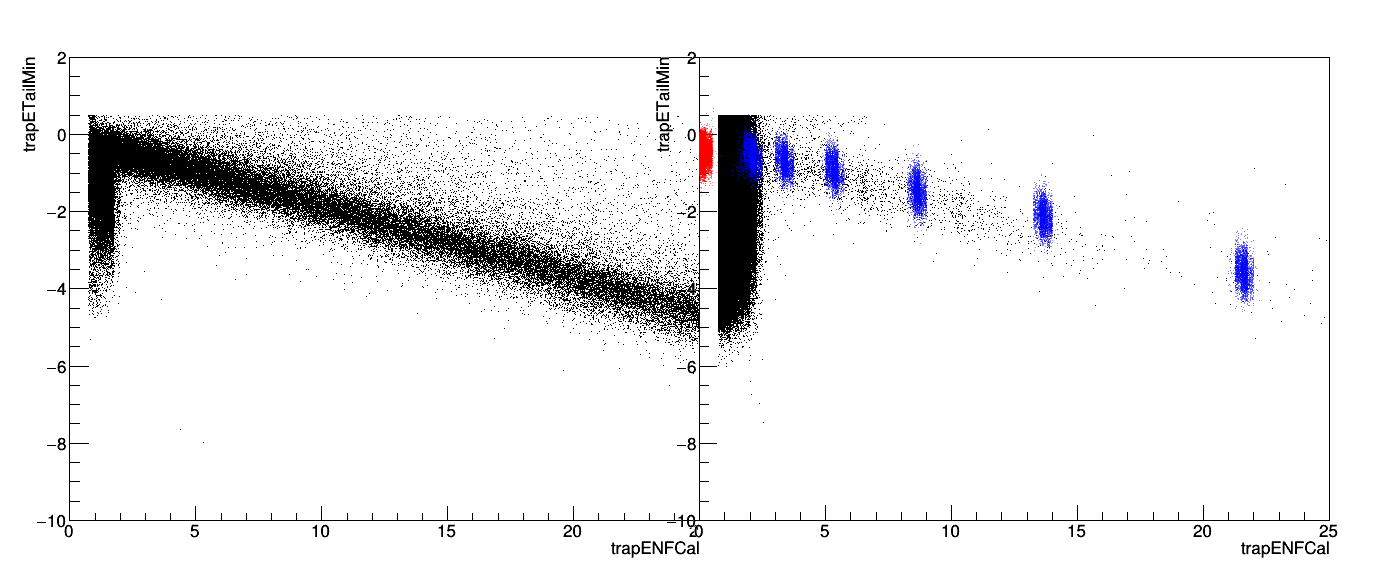

In [6]:
c1.cd(1); ROOT.gPad.SetLogy(0); c1.cd(2); ROOT.gPad.SetLogy(0)
xBins, xBinL, xBinH = 100, 0, 25
yBins, yBinL, yBinH = 10000, -10, 2
xStr, yStr = 'trapENFCal', 'trapETailMin'
h1=ROOT.TH2D("h1","",xBins,xBinL,xBinH,yBins,yBinL,yBinH);cal.Project("h1",yStr+":"+xStr,theCut)
h2=ROOT.TH2D("h2","",xBins,xBinL,xBinH,yBins,yBinL,yBinH);bg.Project("h2",yStr+":"+xStr,theCut)
h3=ROOT.TH2D("h3","",xBins,xBinL,xBinH,yBins,yBinL,yBinH);FT.Project("h3",yStr+":"+xStr)
h4=ROOT.TH2D("h4","",xBins,xBinL,xBinH,yBins,yBinL,yBinH);Ext.Project("h4",yStr+":"+xStr,"channel == 624")
h1.GetXaxis().SetTitle(xStr); h1.GetYaxis().SetTitle(yStr)
h2.GetXaxis().SetTitle(xStr); h2.GetYaxis().SetTitle(yStr)
c1.cd(1); h1.Draw()
c1.cd(2); h2.Draw()
h3.SetMarkerColorAlpha(ROOT.kRed, 0.5); h3.Draw("SAME")
h4.SetMarkerColorAlpha(ROOT.kBlue, 0.5); h4.Draw("SAME")
c1.Draw()

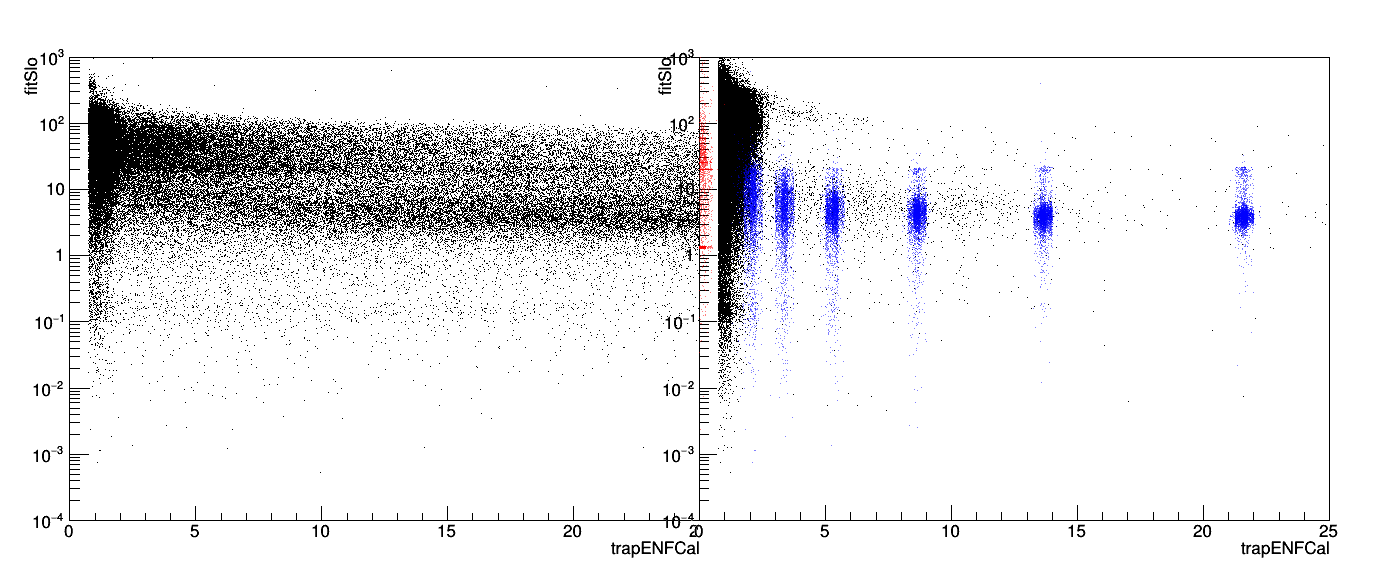

In [7]:
c1.cd(1); ROOT.gPad.SetLogy(1); c1.cd(2); ROOT.gPad.SetLogy(1)
xBins, xBinL, xBinH = 100, 0, 25
yBins, yBinL, yBinH = 10000, 0.0001, 1000
xStr, yStr = 'trapENFCal', 'fitSlo'
h1=ROOT.TH2D("h1","",xBins,xBinL,xBinH,yBins,yBinL,yBinH);cal.Project("h1",yStr+":"+xStr,theCut)
h2=ROOT.TH2D("h2","",xBins,xBinL,xBinH,yBins,yBinL,yBinH);bg.Project("h2",yStr+":"+xStr,theCut)
h3=ROOT.TH2D("h3","",xBins,xBinL,xBinH,yBins,yBinL,yBinH);FT.Project("h3",yStr+":"+xStr)
h4=ROOT.TH2D("h4","",xBins,xBinL,xBinH,yBins,yBinL,yBinH);Ext.Project("h4",yStr+":"+xStr,"channel == 624")
h1.GetXaxis().SetTitle(xStr); h1.GetYaxis().SetTitle(yStr)
h2.GetXaxis().SetTitle(xStr); h2.GetYaxis().SetTitle(yStr)
c1.cd(1); h1.Draw()
c1.cd(2); h2.Draw()
h3.SetMarkerColorAlpha(ROOT.kRed, 0.5); h3.Draw("SAME")
h4.SetMarkerColorAlpha(ROOT.kBlue, 0.5); h4.Draw("SAME")
c1.Draw()

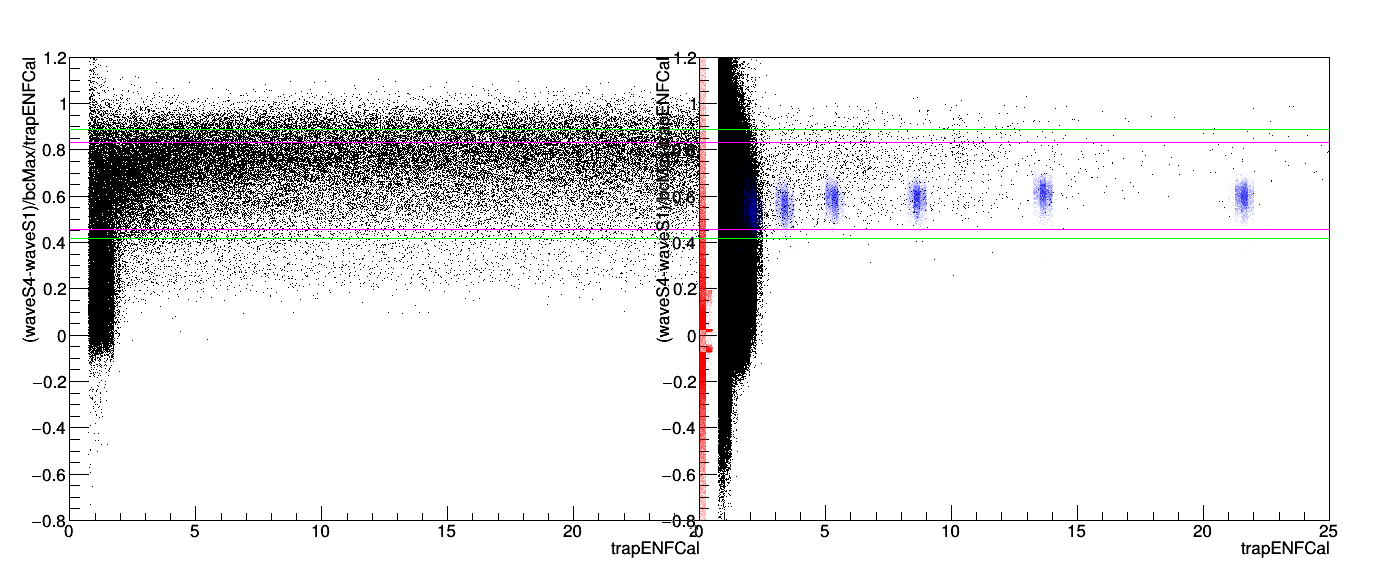

In [8]:
# Noise weight
c1.cd(1); ROOT.gPad.SetLogy(0); c1.cd(2); ROOT.gPad.SetLogy(0)
xBins, xBinL, xBinH = 100, 0, 25
yBins, yBinL, yBinH = 10000, -0.8, 1.2
xStr, yStr = 'trapENFCal', '(waveS4-waveS1)/bcMax/trapENFCal'
h1=ROOT.TH2D("h1","",xBins,xBinL,xBinH,yBins,yBinL,yBinH);cal.Project("h1",yStr+":"+xStr,theCut)
h2=ROOT.TH2D("h2","",xBins,xBinL,xBinH,yBins,yBinL,yBinH);bg.Project("h2",yStr+":"+xStr,theCut)
h3=ROOT.TH2D("h3","",xBins,xBinL,xBinH,yBins,yBinL,yBinH);FT.Project("h3",yStr+":"+xStr)
h4=ROOT.TH2D("h4","",xBins,xBinL,xBinH,yBins,yBinL,yBinH);Ext.Project("h4",yStr+":"+xStr,"channel == 624")
h1.GetXaxis().SetTitle(xStr); h1.GetYaxis().SetTitle(yStr)
h2.GetXaxis().SetTitle(xStr); h2.GetYaxis().SetTitle(yStr)
c1.cd(1); h1.Draw()
line99.DrawLine(xBinL, 0.887, xBinH, 0.887)
line95.DrawLine(xBinL, 0.833, xBinH, 0.833)
line95.DrawLine(xBinL, 0.458, xBinH, 0.458)
line99.DrawLine(xBinL, 0.418, xBinH, 0.418)
c1.cd(2); h2.Draw()
h3.SetMarkerColorAlpha(ROOT.kRed, 0.1); h3.Draw("SAME")
h4.SetMarkerColorAlpha(ROOT.kBlue, 0.1); h4.Draw("SAME")
line99.DrawLine(xBinL, 0.887, xBinH, 0.887)
line95.DrawLine(xBinL, 0.833, xBinH, 0.833)
line95.DrawLine(xBinL, 0.458, xBinH, 0.458)
line99.DrawLine(xBinL, 0.418, xBinH, 0.418)
c1.Draw()

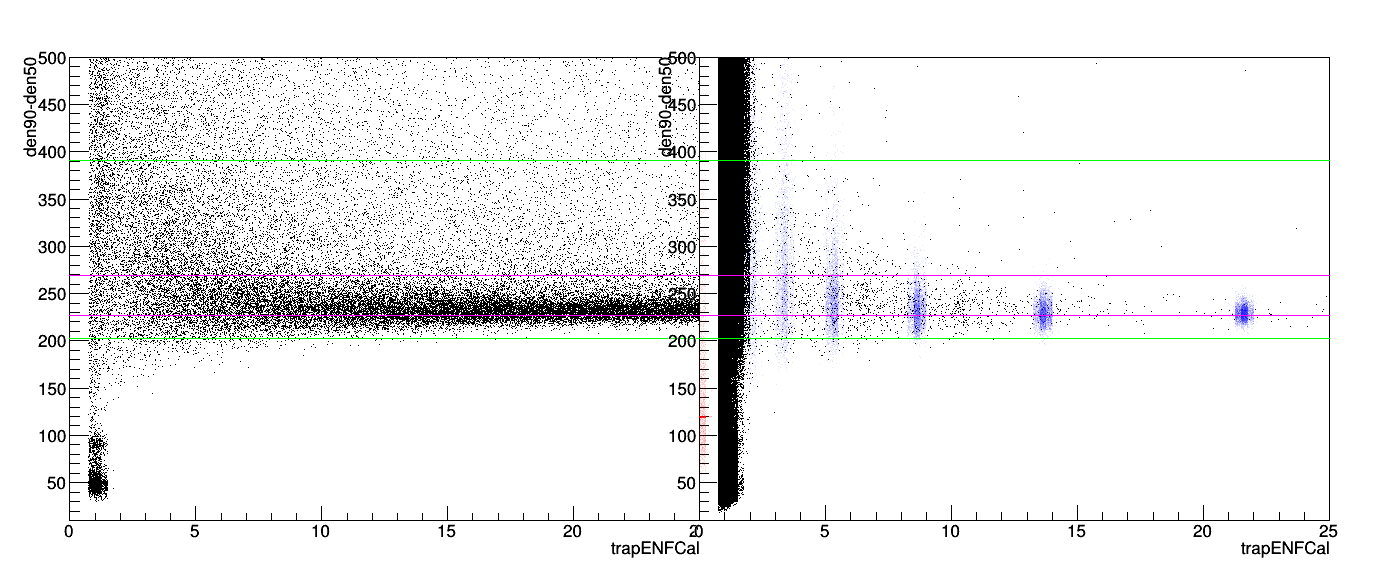

In [9]:
c1.cd(1); ROOT.gPad.SetLogy(0); c1.cd(2); ROOT.gPad.SetLogy(0)
xBins, xBinL, xBinH = 100, 0, 25
yBins, yBinL, yBinH = 10000, 10, 500
xStr, yStr = 'trapENFCal', 'den90-den50'
h1=ROOT.TH2D("h1","",xBins,xBinL,xBinH,yBins,yBinL,yBinH);cal.Project("h1",yStr+":"+xStr,theCut)
h2=ROOT.TH2D("h2","",xBins,xBinL,xBinH,yBins,yBinL,yBinH);bg.Project("h2",yStr+":"+xStr,theCut)
h3=ROOT.TH2D("h3","",xBins,xBinL,xBinH,yBins,yBinL,yBinH);FT.Project("h3",yStr+":"+xStr)
h4=ROOT.TH2D("h4","",xBins,xBinL,xBinH,yBins,yBinL,yBinH);Ext.Project("h4",yStr+":"+xStr,"channel == 624")
h1.GetXaxis().SetTitle(xStr); h1.GetYaxis().SetTitle(yStr)
h2.GetXaxis().SetTitle(xStr); h2.GetYaxis().SetTitle(yStr)
c1.cd(1); h1.Draw()
line99.DrawLine(xBinL, 391.000, xBinH, 391.000)
line95.DrawLine(xBinL, 269.000, xBinH, 269.000)
line95.DrawLine(xBinL, 227.000, xBinH, 227.000)
line99.DrawLine(xBinL, 203.000, xBinH, 203.000)
c1.cd(2); h2.Draw()
h3.SetMarkerColorAlpha(ROOT.kRed, 0.1); h3.Draw("SAME")
h4.SetMarkerColorAlpha(ROOT.kBlue, 0.1); h4.Draw("SAME")
line99.DrawLine(xBinL, 391.000, xBinH, 391.000)
line95.DrawLine(xBinL, 269.000, xBinH, 269.000)
line95.DrawLine(xBinL, 227.000, xBinH, 227.000)
line99.DrawLine(xBinL, 203.000, xBinH, 203.000)
c1.Draw()

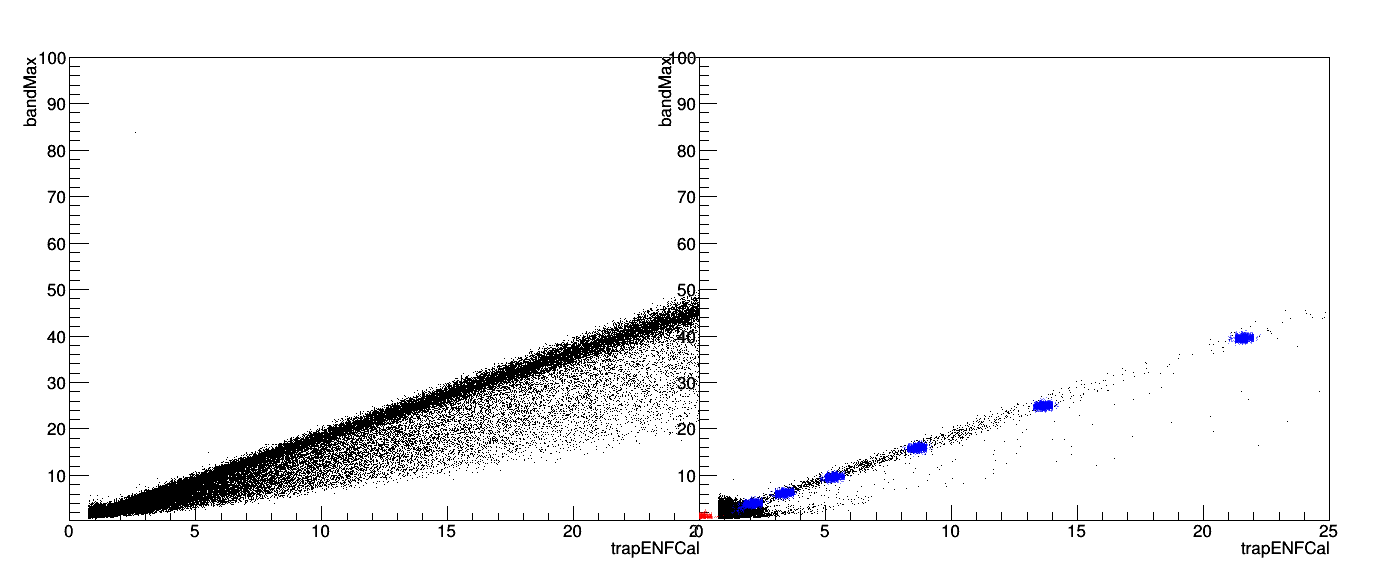

In [10]:
c1.cd(1); ROOT.gPad.SetLogy(0); c1.cd(2); ROOT.gPad.SetLogy(0)
xBins, xBinL, xBinH = 100, 0, 25
yBins, yBinL, yBinH = 10000, 0.3, 100
xStr, yStr = 'trapENFCal', 'bandMax'
h1=ROOT.TH2D("h1","",xBins,xBinL,xBinH,yBins,yBinL,yBinH);cal.Project("h1",yStr+":"+xStr,theCut+"&& bcMax<730")
h2=ROOT.TH2D("h2","",xBins,xBinL,xBinH,yBins,yBinL,yBinH);bg.Project("h2",yStr+":"+xStr,theCut+"&& bcMax<730")
h3=ROOT.TH2D("h3","",xBins,xBinL,xBinH,yBins,yBinL,yBinH);FT.Project("h3",yStr+":"+xStr)
h4=ROOT.TH2D("h4","",xBins,xBinL,xBinH,yBins,yBinL,yBinH);Ext.Project("h4",yStr+":"+xStr,"channel == 624")
h1.GetXaxis().SetTitle(xStr); h1.GetYaxis().SetTitle(yStr)
h2.GetXaxis().SetTitle(xStr); h2.GetYaxis().SetTitle(yStr)
c1.cd(1); h1.Draw()
c1.cd(2); h2.Draw()
h3.SetMarkerColorAlpha(ROOT.kRed, 0.5); h3.Draw("SAME")
h4.SetMarkerColorAlpha(ROOT.kBlue, 0.5); h4.Draw("SAME")
c1.Draw()

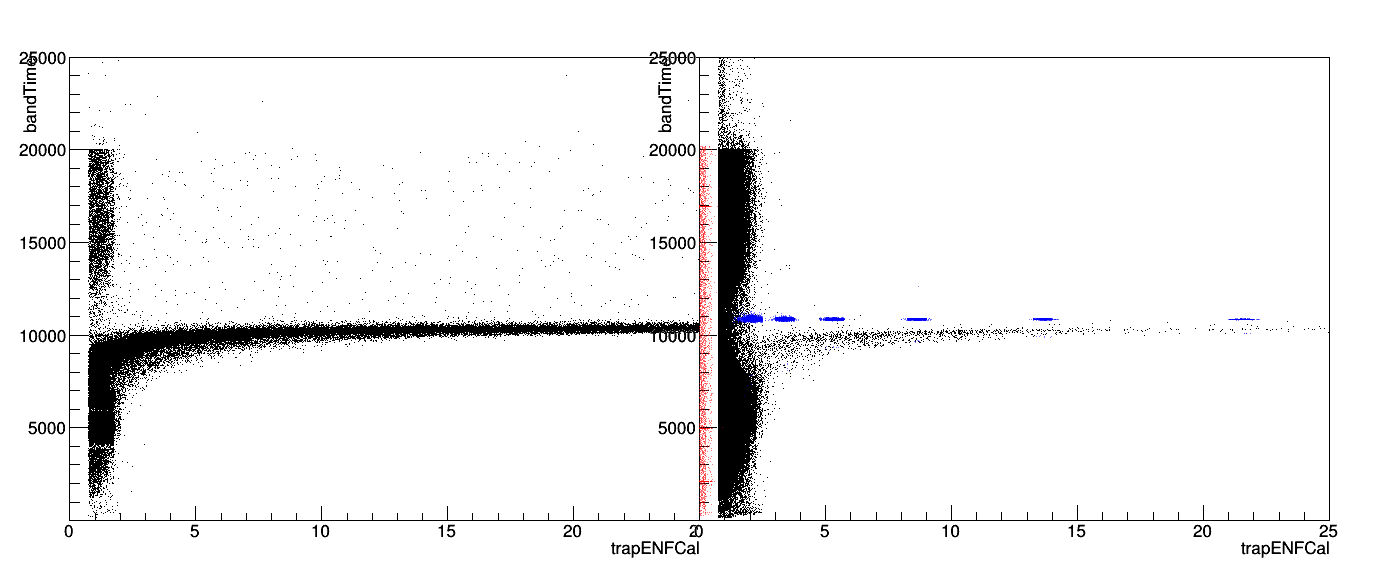

In [11]:
c1.cd(1); ROOT.gPad.SetLogy(0); c1.cd(2); ROOT.gPad.SetLogy(0)
xBins, xBinL, xBinH = 100, 0, 25
yBins, yBinL, yBinH = 10000, 1, 25000
xStr, yStr = 'trapENFCal', 'bandTime'
h1=ROOT.TH2D("h1","",xBins,xBinL,xBinH,yBins,yBinL,yBinH);cal.Project("h1",yStr+":"+xStr,theCut)
h2=ROOT.TH2D("h2","",xBins,xBinL,xBinH,yBins,yBinL,yBinH);bg.Project("h2",yStr+":"+xStr,theCut)
h3=ROOT.TH2D("h3","",xBins,xBinL,xBinH,yBins,yBinL,yBinH);FT.Project("h3",yStr+":"+xStr)
h4=ROOT.TH2D("h4","",xBins,xBinL,xBinH,yBins,yBinL,yBinH);Ext.Project("h4",yStr+":"+xStr,"channel == 624")
h1.GetXaxis().SetTitle(xStr); h1.GetYaxis().SetTitle(yStr)
h2.GetXaxis().SetTitle(xStr); h2.GetYaxis().SetTitle(yStr)
c1.cd(1); h1.Draw()
c1.cd(2); h2.Draw()
h3.SetMarkerColorAlpha(ROOT.kRed, 0.5); h3.Draw("SAME")
h4.SetMarkerColorAlpha(ROOT.kBlue, 0.5); h4.Draw("SAME")
c1.Draw()

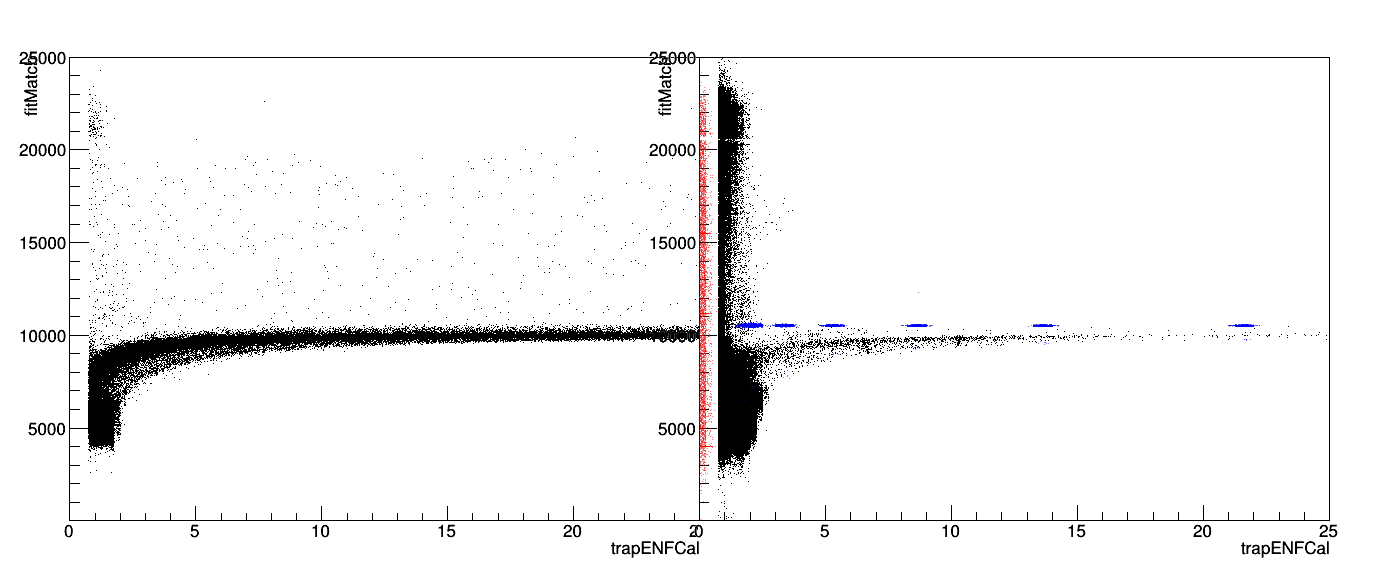

In [12]:
c1.cd(1); ROOT.gPad.SetLogy(0); c1.cd(2); ROOT.gPad.SetLogy(0)
xBins, xBinL, xBinH = 100, 0, 25
yBins, yBinL, yBinH = 10000, 10, 25000
xStr, yStr = 'trapENFCal', 'fitMatch'
h1=ROOT.TH2D("h1","",xBins,xBinL,xBinH,yBins,yBinL,yBinH);cal.Project("h1",yStr+":"+xStr,theCut)
h2=ROOT.TH2D("h2","",xBins,xBinL,xBinH,yBins,yBinL,yBinH);bg.Project("h2",yStr+":"+xStr,theCut)
h3=ROOT.TH2D("h3","",xBins,xBinL,xBinH,yBins,yBinL,yBinH);FT.Project("h3",yStr+":"+xStr)
h4=ROOT.TH2D("h4","",xBins,xBinL,xBinH,yBins,yBinL,yBinH);Ext.Project("h4",yStr+":"+xStr,"channel == 624")
h1.GetXaxis().SetTitle(xStr); h1.GetYaxis().SetTitle(yStr)
h2.GetXaxis().SetTitle(xStr); h2.GetYaxis().SetTitle(yStr)
c1.cd(1); h1.Draw()
c1.cd(2); h2.Draw()
h3.SetMarkerColorAlpha(ROOT.kRed, 0.5); h3.Draw("SAME")
h4.SetMarkerColorAlpha(ROOT.kBlue, 0.5); h4.Draw("SAME")
c1.Draw()

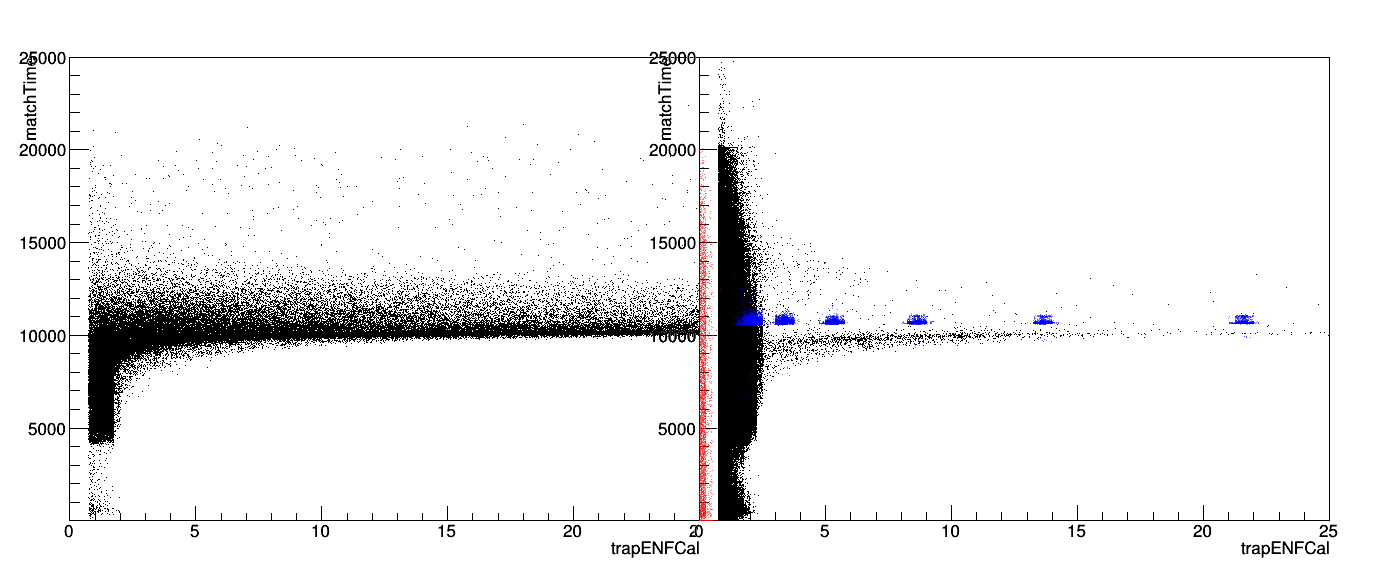

In [13]:
c1.cd(1); ROOT.gPad.SetLogy(0); c1.cd(2); ROOT.gPad.SetLogy(0)
xBins, xBinL, xBinH = 100, 0, 25
yBins, yBinL, yBinH = 10000, 10, 25000
xStr, yStr = 'trapENFCal', 'matchTime'
h1=ROOT.TH2D("h1","",xBins,xBinL,xBinH,yBins,yBinL,yBinH);cal.Project("h1",yStr+":"+xStr,theCut)
h2=ROOT.TH2D("h2","",xBins,xBinL,xBinH,yBins,yBinL,yBinH);bg.Project("h2",yStr+":"+xStr,theCut)
h3=ROOT.TH2D("h3","",xBins,xBinL,xBinH,yBins,yBinL,yBinH);FT.Project("h3",yStr+":"+xStr)
h4=ROOT.TH2D("h4","",xBins,xBinL,xBinH,yBins,yBinL,yBinH);Ext.Project("h4",yStr+":"+xStr,"channel == 624")
h1.GetXaxis().SetTitle(xStr); h1.GetYaxis().SetTitle(yStr)
h2.GetXaxis().SetTitle(xStr); h2.GetYaxis().SetTitle(yStr)
c1.cd(1); h1.Draw()
c1.cd(2); h2.Draw()
h3.SetMarkerColorAlpha(ROOT.kRed, 0.5); h3.Draw("SAME")
h4.SetMarkerColorAlpha(ROOT.kBlue, 0.5); h4.Draw("SAME")
c1.Draw()

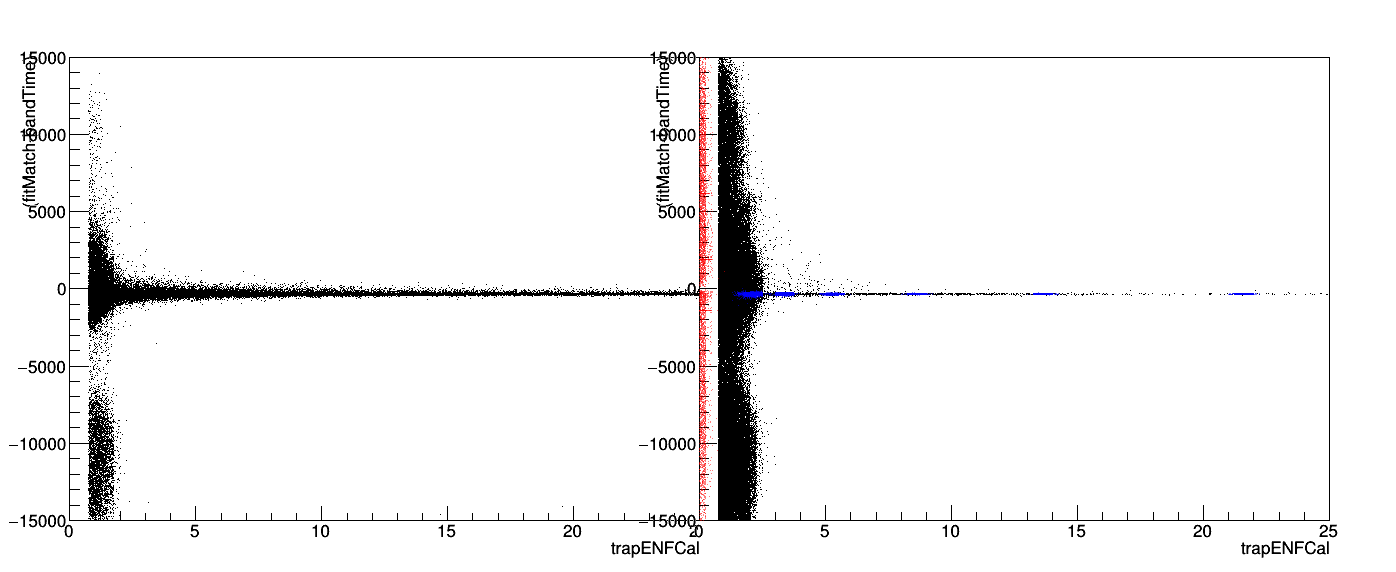

In [14]:
c1.cd(1); ROOT.gPad.SetLogy(0); c1.cd(2); ROOT.gPad.SetLogy(0)
xBins, xBinL, xBinH = 100, 0, 25
yBins, yBinL, yBinH = 10000, -15000, 15000
xStr, yStr = 'trapENFCal', '(fitMatch-bandTime)'
h1=ROOT.TH2D("h1","",xBins,xBinL,xBinH,yBins,yBinL,yBinH);cal.Project("h1",yStr+":"+xStr,theCut)
h2=ROOT.TH2D("h2","",xBins,xBinL,xBinH,yBins,yBinL,yBinH);bg.Project("h2",yStr+":"+xStr,theCut)
h3=ROOT.TH2D("h3","",xBins,xBinL,xBinH,yBins,yBinL,yBinH);FT.Project("h3",yStr+":"+xStr)
h4=ROOT.TH2D("h4","",xBins,xBinL,xBinH,yBins,yBinL,yBinH);Ext.Project("h4",yStr+":"+xStr,"channel == 624")
h1.GetXaxis().SetTitle(xStr); h1.GetYaxis().SetTitle(yStr)
h2.GetXaxis().SetTitle(xStr); h2.GetYaxis().SetTitle(yStr)
c1.cd(1); h1.Draw()
c1.cd(2); h2.Draw()
h3.SetMarkerColorAlpha(ROOT.kRed, 0.5); h3.Draw("SAME")
h4.SetMarkerColorAlpha(ROOT.kBlue, 0.5); h4.Draw("SAME")
c1.Draw()

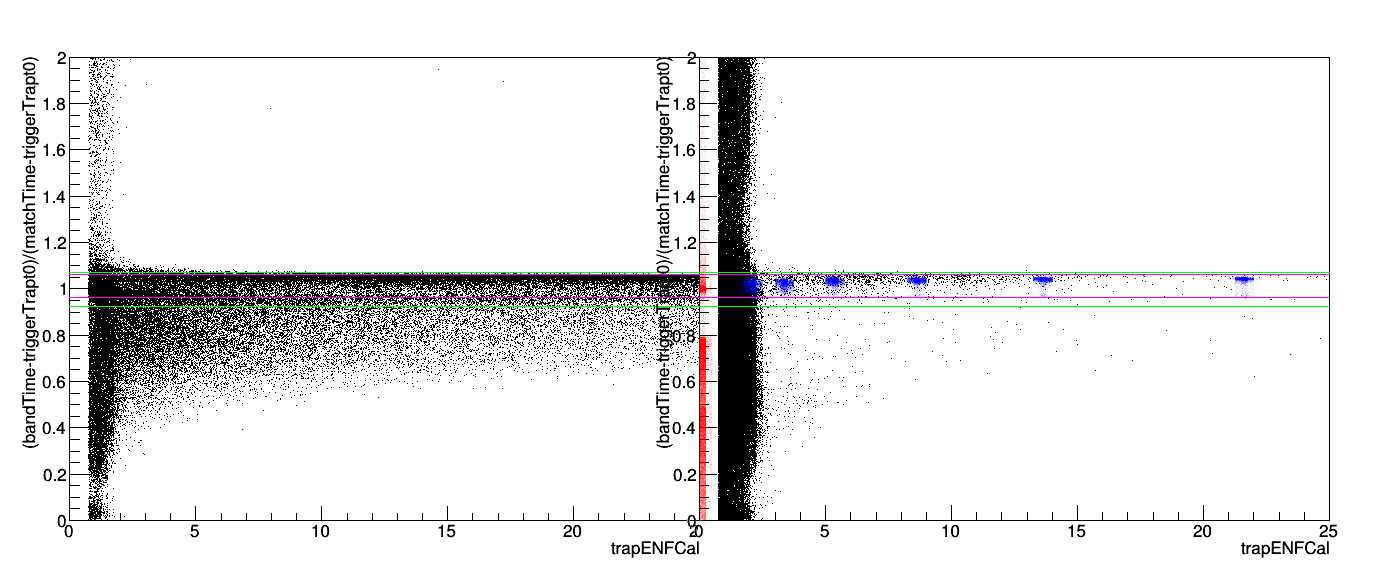

In [15]:
c1.cd(1); ROOT.gPad.SetLogy(0); c1.cd(2); ROOT.gPad.SetLogy(0)
xBins, xBinL, xBinH = 100, 0, 25
yBins, yBinL, yBinH = 10000, 0, 2
xStr, yStr = 'trapENFCal', '(bandTime-triggerTrapt0)/(matchTime-triggerTrapt0)'
h1=ROOT.TH2D("h1","",xBins,xBinL,xBinH,yBins,yBinL,yBinH);cal.Project("h1",yStr+":"+xStr,theCut)
h2=ROOT.TH2D("h2","",xBins,xBinL,xBinH,yBins,yBinL,yBinH);bg.Project("h2",yStr+":"+xStr,theCut)
h3=ROOT.TH2D("h3","",xBins,xBinL,xBinH,yBins,yBinL,yBinH);FT.Project("h3",yStr+":"+xStr)
h4=ROOT.TH2D("h4","",xBins,xBinL,xBinH,yBins,yBinL,yBinH);Ext.Project("h4",yStr+":"+xStr,"channel == 624")
h1.GetXaxis().SetTitle(xStr); h1.GetYaxis().SetTitle(yStr)
h2.GetXaxis().SetTitle(xStr); h2.GetYaxis().SetTitle(yStr)
c1.cd(1); h1.Draw()
line99.DrawLine(xBinL, 1.069, xBinH, 1.069)
line95.DrawLine(xBinL, 1.063, xBinH, 1.063)
line95.DrawLine(xBinL, 0.964, xBinH, 0.964)
line99.DrawLine(xBinL, 0.925, xBinH, 0.925)
c1.cd(2); h2.Draw()
h3.SetMarkerColorAlpha(ROOT.kRed, 0.1); h3.Draw("SAME")
h4.SetMarkerColorAlpha(ROOT.kBlue, 0.1); h4.Draw("SAME")
line99.DrawLine(xBinL, 1.069, xBinH, 1.069)
line95.DrawLine(xBinL, 1.063, xBinH, 1.063)
line95.DrawLine(xBinL, 0.964, xBinH, 0.964)
line99.DrawLine(xBinL, 0.925, xBinH, 0.925)
c1.Draw()

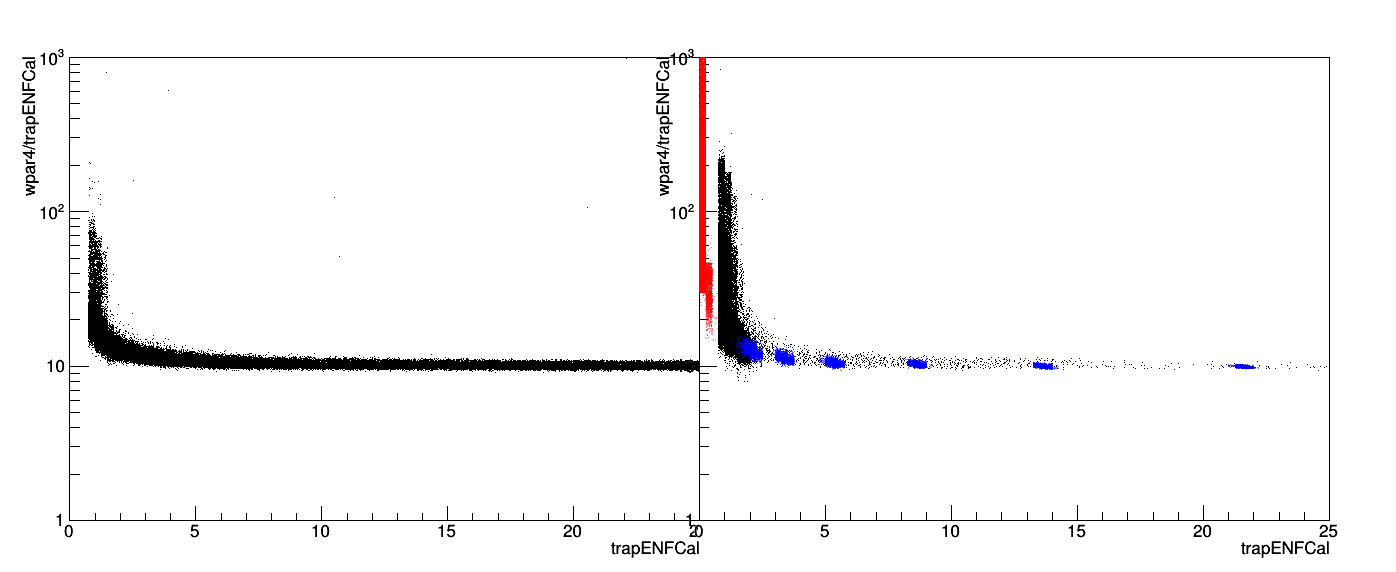

In [16]:
c1.cd(1); ROOT.gPad.SetLogy(1); c1.cd(2); ROOT.gPad.SetLogy(1)
xBins, xBinL, xBinH = 100, 0, 25
yBins, yBinL, yBinH = 10000, 1, 1000
xStr, yStr = 'trapENFCal', 'wpar4/trapENFCal'
h1=ROOT.TH2D("h1","",xBins,xBinL,xBinH,yBins,yBinL,yBinH);cal.Project("h1",yStr+":"+xStr,theCut)
h2=ROOT.TH2D("h2","",xBins,xBinL,xBinH,yBins,yBinL,yBinH);bg.Project("h2",yStr+":"+xStr,theCut)
h3=ROOT.TH2D("h3","",xBins,xBinL,xBinH,yBins,yBinL,yBinH);FT.Project("h3",yStr+":"+xStr)
h4=ROOT.TH2D("h4","",xBins,xBinL,xBinH,yBins,yBinL,yBinH);Ext.Project("h4",yStr+":"+xStr,"channel == 624")
h1.GetXaxis().SetTitle(xStr); h1.GetYaxis().SetTitle(yStr)
h2.GetXaxis().SetTitle(xStr); h2.GetYaxis().SetTitle(yStr)
c1.cd(1); h1.Draw()
c1.cd(2); h2.Draw()
h3.SetMarkerColorAlpha(ROOT.kRed, 0.5); h3.Draw("SAME")
h4.SetMarkerColorAlpha(ROOT.kBlue, 0.5); h4.Draw("SAME")
c1.Draw()

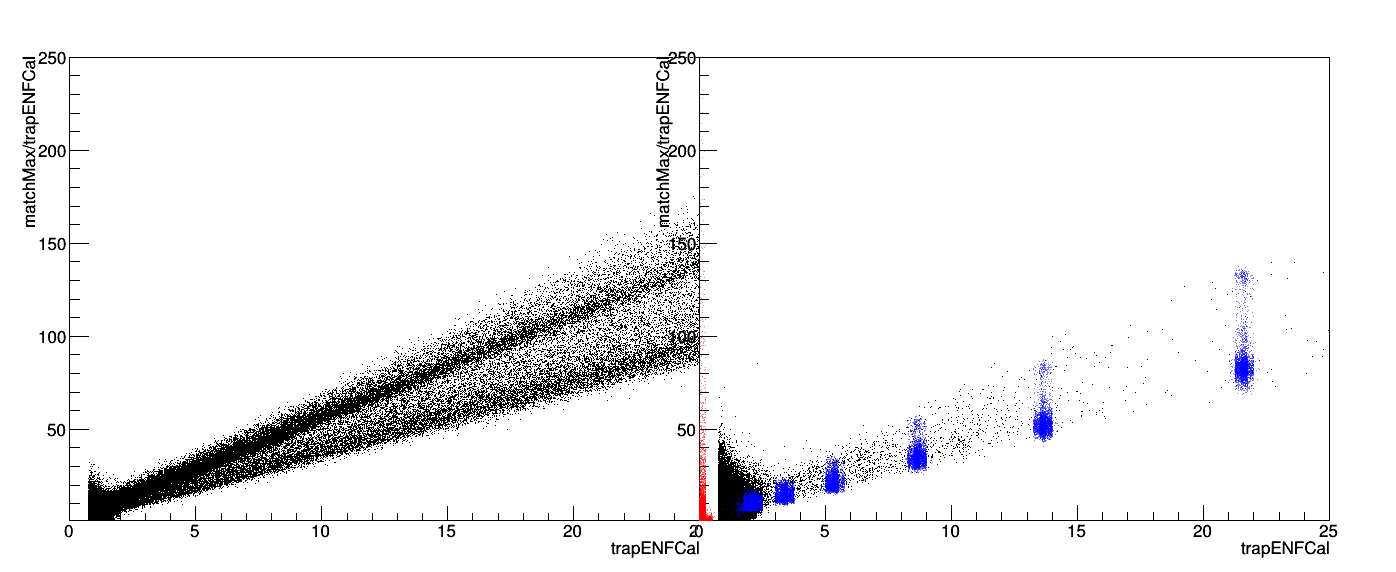

In [17]:
c1.cd(1); ROOT.gPad.SetLogy(0); c1.cd(2); ROOT.gPad.SetLogy(0)
xBins, xBinL, xBinH = 100, 0, 25
yBins, yBinL, yBinH = 10000, 1, 250
xStr, yStr = 'trapENFCal', 'matchMax/trapENFCal'
h1=ROOT.TH2D("h1","",xBins,xBinL,xBinH,yBins,yBinL,yBinH);cal.Project("h1",yStr+":"+xStr,theCut)
h2=ROOT.TH2D("h2","",xBins,xBinL,xBinH,yBins,yBinL,yBinH);bg.Project("h2",yStr+":"+xStr,theCut)
h3=ROOT.TH2D("h3","",xBins,xBinL,xBinH,yBins,yBinL,yBinH);FT.Project("h3",yStr+":"+xStr)
h4=ROOT.TH2D("h4","",xBins,xBinL,xBinH,yBins,yBinL,yBinH);Ext.Project("h4",yStr+":"+xStr,"channel == 624")
h1.GetXaxis().SetTitle(xStr); h1.GetYaxis().SetTitle(yStr)
h2.GetXaxis().SetTitle(xStr); h2.GetYaxis().SetTitle(yStr)
c1.cd(1); h1.Draw()
c1.cd(2); h2.Draw()
h3.SetMarkerColorAlpha(ROOT.kRed, 0.5); h3.Draw("SAME")
h4.SetMarkerColorAlpha(ROOT.kBlue, 0.5); h4.Draw("SAME")
c1.Draw()

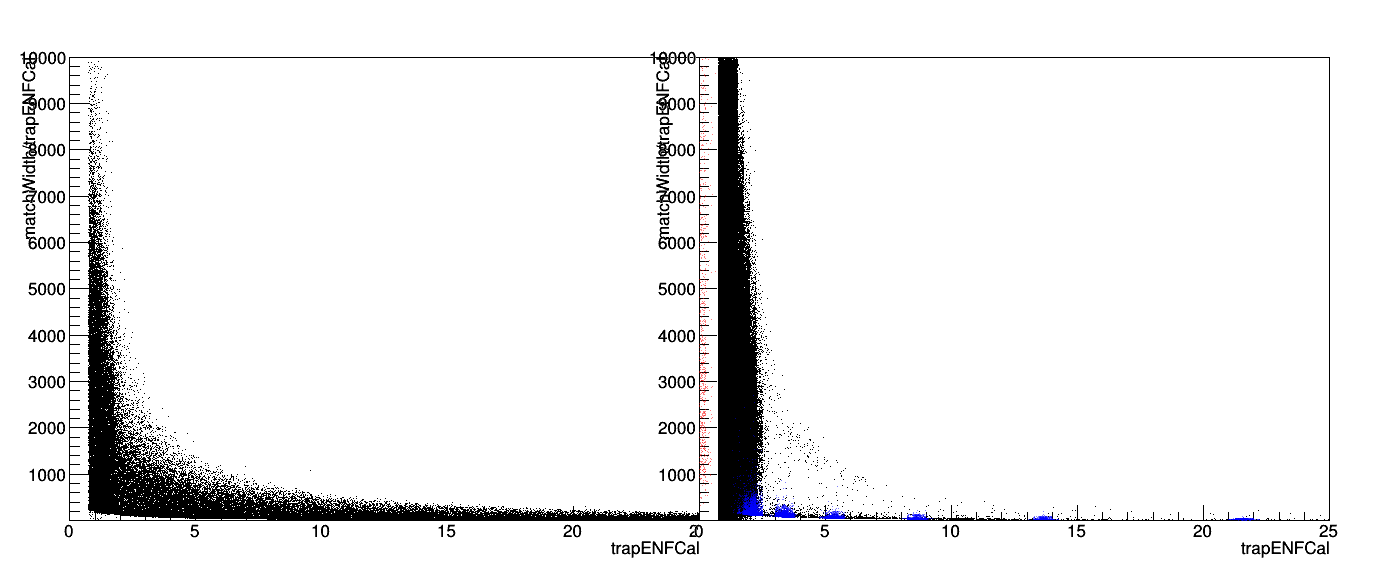

In [18]:
c1.cd(1); ROOT.gPad.SetLogy(0); c1.cd(2); ROOT.gPad.SetLogy(0)
xBins, xBinL, xBinH = 100, 0, 25
yBins, yBinL, yBinH = 10000, 1, 10000
xStr, yStr = 'trapENFCal', 'matchWidth/trapENFCal'
h1=ROOT.TH2D("h1","",xBins,xBinL,xBinH,yBins,yBinL,yBinH);cal.Project("h1",yStr+":"+xStr,theCut)
h2=ROOT.TH2D("h2","",xBins,xBinL,xBinH,yBins,yBinL,yBinH);bg.Project("h2",yStr+":"+xStr,theCut)
h3=ROOT.TH2D("h3","",xBins,xBinL,xBinH,yBins,yBinL,yBinH);FT.Project("h3",yStr+":"+xStr)
h4=ROOT.TH2D("h4","",xBins,xBinL,xBinH,yBins,yBinL,yBinH);Ext.Project("h4",yStr+":"+xStr,"channel == 624")
h1.GetXaxis().SetTitle(xStr); h1.GetYaxis().SetTitle(yStr)
h2.GetXaxis().SetTitle(xStr); h2.GetYaxis().SetTitle(yStr)
c1.cd(1); h1.Draw()
c1.cd(2); h2.Draw()
h3.SetMarkerColorAlpha(ROOT.kRed, 0.5); h3.Draw("SAME")
h4.SetMarkerColorAlpha(ROOT.kBlue, 0.5); h4.Draw("SAME")
c1.Draw()


****************************************
Minimizer is Linear
Chi2                      =  5.70378e+08
NDf                       =        11372
p0                        =  -0.00328528   +/-   0.0169661   
p1                        =   0.00153042   +/-   0.00488881  
p2                        =    0.0126573   +/-   0.000399255 
p3                        =  1.49627e-06   +/-   9.6557e-06  

****************************************
Minimizer is Linear
Chi2                      =  8.68329e+06
NDf                       =          826
p0                        =    -0.041098   +/-   0.01672     
p1                        =    0.0066151   +/-   0.00703949  
p2                        =    0.0137278   +/-   0.000761491 
p3                        = -5.90589e-05   +/-   2.21962e-05 


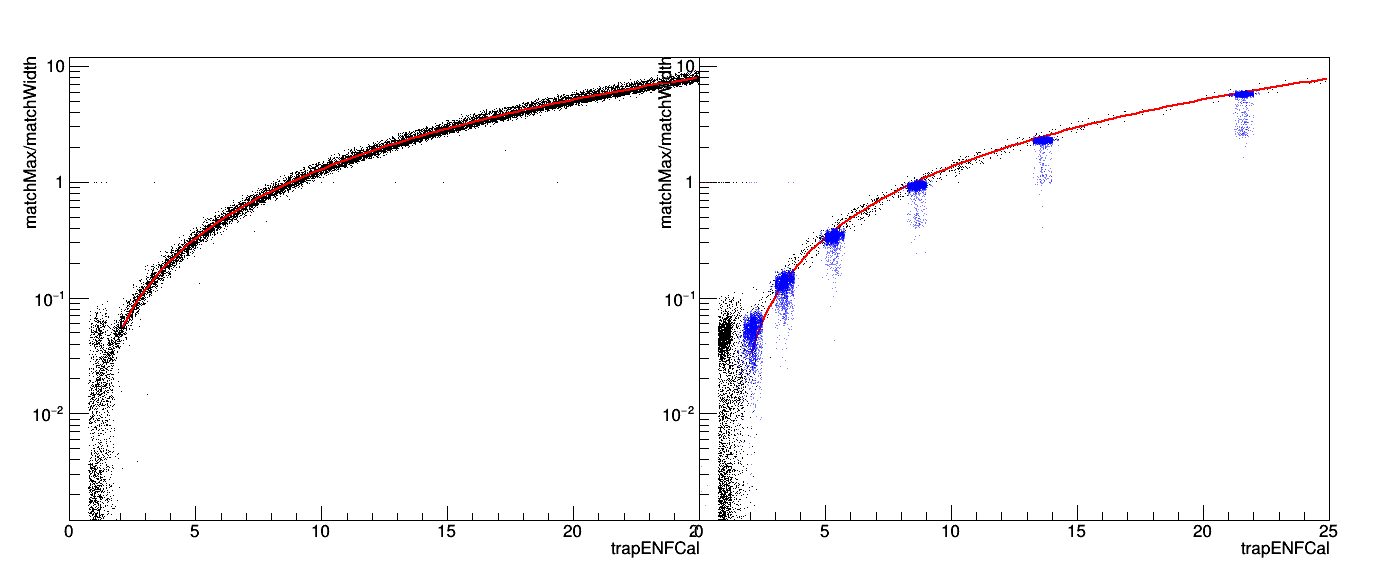

In [19]:
c1.cd(1); ROOT.gPad.SetLogy(1); c1.cd(2); ROOT.gPad.SetLogy(1)
xBins, xBinL, xBinH = 100, 0, 25
yBins, yBinL, yBinH = 10000, 0, 12
xStr, yStr = 'trapENFCal', 'matchMax/matchWidth'
h1=ROOT.TH2D("h1","",xBins,xBinL,xBinH,yBins,yBinL,yBinH);cal.Project("h1",yStr+":"+xStr,theCut + "&& fitSlo<5")
h2=ROOT.TH2D("h2","",xBins,xBinL,xBinH,yBins,yBinL,yBinH);bg.Project("h2",yStr+":"+xStr,theCut +"&& fitSlo<5")
h3=ROOT.TH2D("h3","",xBins,xBinL,xBinH,yBins,yBinL,yBinH);FT.Project("h3",yStr+":"+xStr)
h4=ROOT.TH2D("h4","",xBins,xBinL,xBinH,yBins,yBinL,yBinH);Ext.Project("h4",yStr+":"+xStr,"channel == 624")
h1.GetXaxis().SetTitle(xStr); h1.GetYaxis().SetTitle(yStr)
h2.GetXaxis().SetTitle(xStr); h2.GetYaxis().SetTitle(yStr)
c1.cd(1); h1.Draw(); h1.Fit("pol3","","",2,25)
c1.cd(2); h2.Draw(); h2.Fit("pol3","","",2,25)
h3.SetMarkerColorAlpha(ROOT.kRed, 0.5); h3.Draw("SAME")
h4.SetMarkerColorAlpha(ROOT.kBlue, 0.5); h4.Draw("SAME")
c1.Draw()

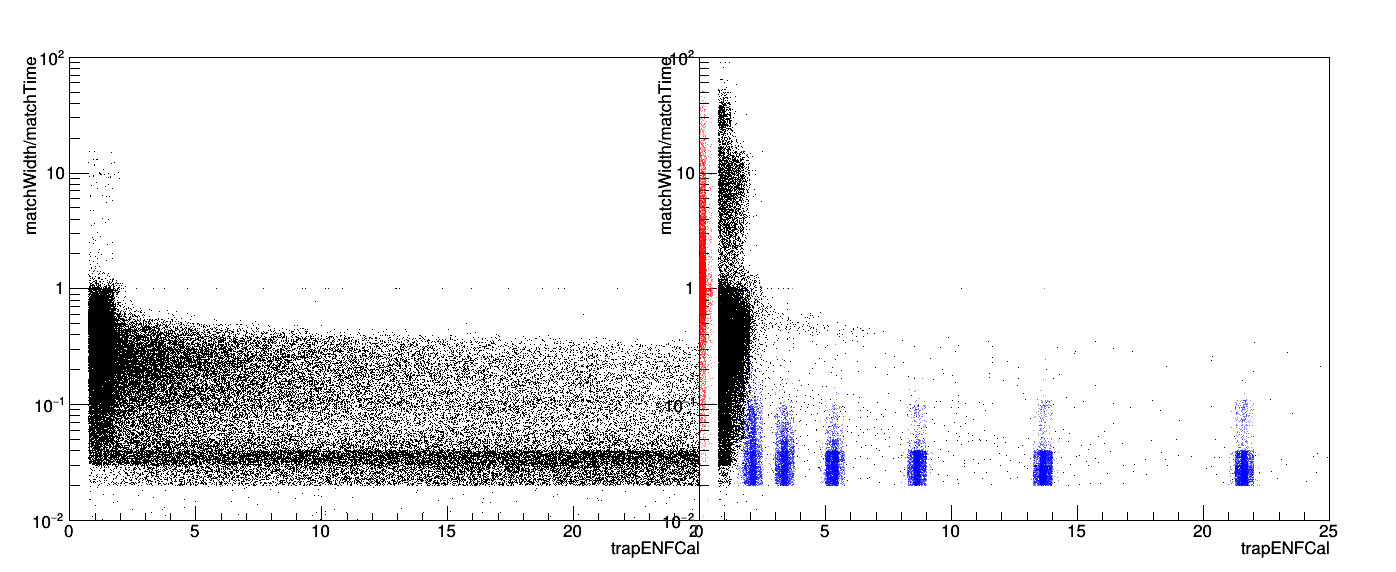

In [20]:
c1.cd(1); ROOT.gPad.SetLogy(1); c1.cd(2); ROOT.gPad.SetLogy(1)
xBins, xBinL, xBinH = 100, 0, 25
yBins, yBinL, yBinH = 10000, 0.01, 100
xStr, yStr = 'trapENFCal', 'matchWidth/matchTime'
h1=ROOT.TH2D("h1","",xBins,xBinL,xBinH,yBins,yBinL,yBinH);cal.Project("h1",yStr+":"+xStr,theCut)
h2=ROOT.TH2D("h2","",xBins,xBinL,xBinH,yBins,yBinL,yBinH);bg.Project("h2",yStr+":"+xStr,theCut)
h3=ROOT.TH2D("h3","",xBins,xBinL,xBinH,yBins,yBinL,yBinH);FT.Project("h3",yStr+":"+xStr)
h4=ROOT.TH2D("h4","",xBins,xBinL,xBinH,yBins,yBinL,yBinH);Ext.Project("h4",yStr+":"+xStr,"channel == 624")
h1.GetXaxis().SetTitle(xStr); h1.GetYaxis().SetTitle(yStr)
h2.GetXaxis().SetTitle(xStr); h2.GetYaxis().SetTitle(yStr)
c1.cd(1); h1.Draw()
c1.cd(2); h2.Draw()
h3.SetMarkerColorAlpha(ROOT.kRed, 0.5); h3.Draw("SAME")
h4.SetMarkerColorAlpha(ROOT.kBlue, 0.5); h4.Draw("SAME")
c1.Draw()

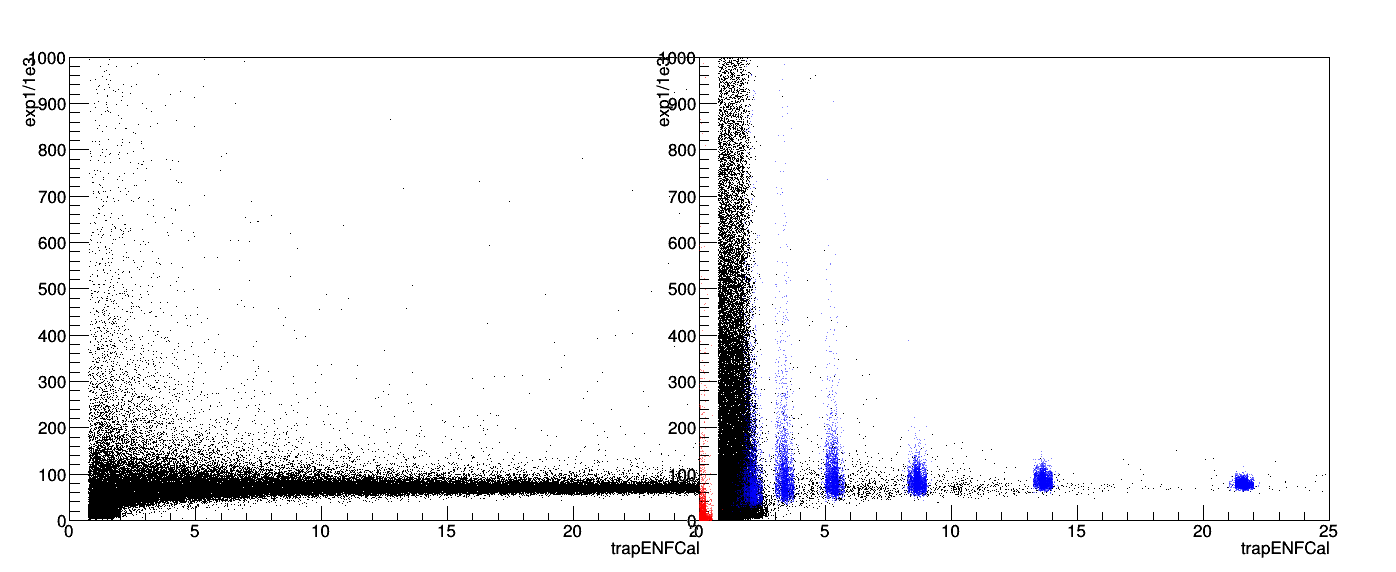

In [21]:
c1.cd(1); ROOT.gPad.SetLogy(0); c1.cd(2); ROOT.gPad.SetLogy(0)
xBins, xBinL, xBinH = 100, 0, 25
yBins, yBinL, yBinH = 10000, 0, 1000
xStr, yStr = 'trapENFCal', 'exp1/1e3'
h1=ROOT.TH2D("h1","",xBins,xBinL,xBinH,yBins,yBinL,yBinH);cal.Project("h1",yStr+":"+xStr,theCut)
h2=ROOT.TH2D("h2","",xBins,xBinL,xBinH,yBins,yBinL,yBinH);bg.Project("h2",yStr+":"+xStr,theCut)
h3=ROOT.TH2D("h3","",xBins,xBinL,xBinH,yBins,yBinL,yBinH);FT.Project("h3",yStr+":"+xStr)
h4=ROOT.TH2D("h4","",xBins,xBinL,xBinH,yBins,yBinL,yBinH);Ext.Project("h4",yStr+":"+xStr,"channel == 624")
h1.GetXaxis().SetTitle(xStr); h1.GetYaxis().SetTitle(yStr)
h2.GetXaxis().SetTitle(xStr); h2.GetYaxis().SetTitle(yStr)
c1.cd(1); h1.Draw()
c1.cd(2); h2.Draw()
h3.SetMarkerColorAlpha(ROOT.kRed, 0.5); h3.Draw("SAME")
h4.SetMarkerColorAlpha(ROOT.kBlue, 0.5); h4.Draw("SAME")
c1.Draw()

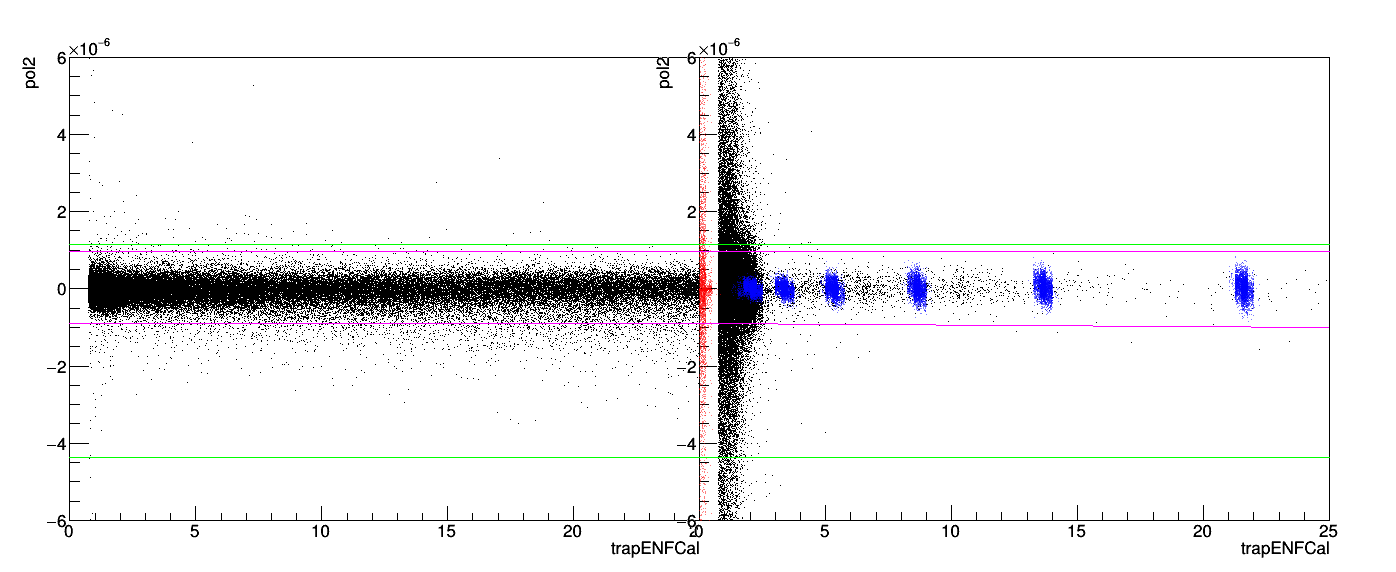

In [22]:
c1.cd(1); ROOT.gPad.SetLogy(0); c1.cd(2); ROOT.gPad.SetLogy(0)
xBins, xBinL, xBinH = 100, 0, 25
yBins, yBinL, yBinH = 10000, -6e-6, 6e-6
xStr, yStr = 'trapENFCal', 'pol2'
h1=ROOT.TH2D("h1","",xBins,xBinL,xBinH,yBins,yBinL,yBinH);cal.Project("h1",yStr+":"+xStr,theCut)
h2=ROOT.TH2D("h2","",xBins,xBinL,xBinH,yBins,yBinL,yBinH);bg.Project("h2",yStr+":"+xStr,theCut)
h3=ROOT.TH2D("h3","",xBins,xBinL,xBinH,yBins,yBinL,yBinH);FT.Project("h3",yStr+":"+xStr)
h4=ROOT.TH2D("h4","",xBins,xBinL,xBinH,yBins,yBinL,yBinH);Ext.Project("h4",yStr+":"+xStr,"channel == 624")
h1.GetXaxis().SetTitle(xStr); h1.GetYaxis().SetTitle(yStr)
h2.GetXaxis().SetTitle(xStr); h2.GetYaxis().SetTitle(yStr)
c1.cd(1); h1.Draw()
line99.DrawLine(xBinL, 1.14e-06, xBinH, 1.14e-06)
line95.DrawLine(xBinL, 9.60e-07, xBinH, 9.60e-07)
line95.DrawLine(xBinL, -8.88e-07, xBinH, -8.88e-07)
line99.DrawLine(xBinL, -4.37e-06, xBinH, -4.37e-06)
c1.cd(2); h2.Draw()
h3.SetMarkerColorAlpha(ROOT.kRed, 0.5); h3.Draw("SAME")
h4.SetMarkerColorAlpha(ROOT.kBlue, 0.5); h4.Draw("SAME")
line99.DrawLine(xBinL, 1.14e-06, xBinH, 1.14e-06)
line95.DrawLine(xBinL, 9.60e-07, xBinH, 9.60e-07)
line95.DrawLine(xBinL, -8.88e-07, xBinH, -9.88e-07)
line99.DrawLine(xBinL, -4.37e-06, xBinH, -4.37e-06)
c1.Draw()

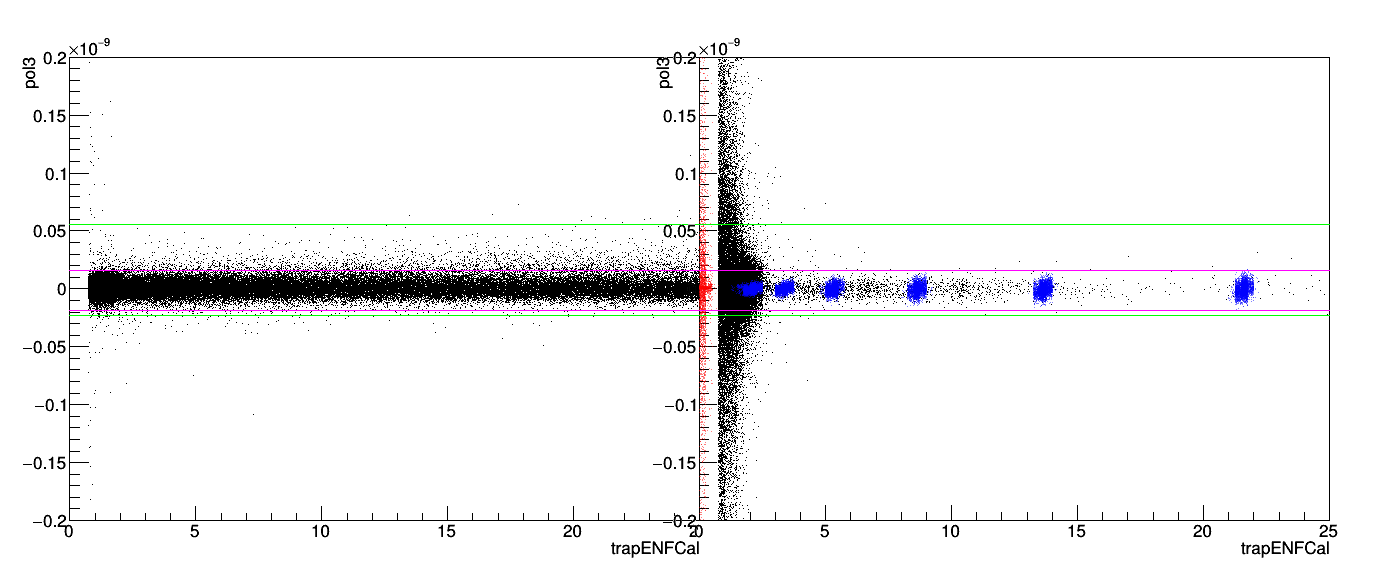

In [23]:
c1.cd(1); ROOT.gPad.SetLogy(0); c1.cd(2); ROOT.gPad.SetLogy(0)
xBins, xBinL, xBinH = 100, 0, 25
yBins, yBinL, yBinH = 10000, -2e-10, 2e-10
xStr, yStr = 'trapENFCal', 'pol3'
h1=ROOT.TH2D("h1","",xBins,xBinL,xBinH,yBins,yBinL,yBinH);cal.Project("h1",yStr+":"+xStr,theCut)
h2=ROOT.TH2D("h2","",xBins,xBinL,xBinH,yBins,yBinL,yBinH);bg.Project("h2",yStr+":"+xStr,theCut)
h3=ROOT.TH2D("h3","",xBins,xBinL,xBinH,yBins,yBinL,yBinH);FT.Project("h3",yStr+":"+xStr)
h4=ROOT.TH2D("h4","",xBins,xBinL,xBinH,yBins,yBinL,yBinH);Ext.Project("h4",yStr+":"+xStr,"channel == 624")
h1.GetXaxis().SetTitle(xStr); h1.GetYaxis().SetTitle(yStr)
h2.GetXaxis().SetTitle(xStr); h2.GetYaxis().SetTitle(yStr)
c1.cd(1); h1.Draw()
line99.DrawLine(xBinL, 5.56e-11, xBinH, 5.56e-11)
line95.DrawLine(xBinL, 1.62e-11, xBinH, 1.62e-11)
line95.DrawLine(xBinL, -1.86e-11, xBinH, -1.86e-11)
line99.DrawLine(xBinL, -2.34e-11, xBinH, -2.34e-11)
c1.cd(2); h2.Draw()
h3.SetMarkerColorAlpha(ROOT.kRed, 0.5); h3.Draw("SAME")
h4.SetMarkerColorAlpha(ROOT.kBlue, 0.5); h4.Draw("SAME")
line99.DrawLine(xBinL, 5.56e-11, xBinH, 5.56e-11)
line95.DrawLine(xBinL, 1.62e-11, xBinH, 1.62e-11)
line95.DrawLine(xBinL, -1.86e-11, xBinH, -1.86e-11)
line99.DrawLine(xBinL, -2.34e-11, xBinH, -2.34e-11)
c1.Draw()

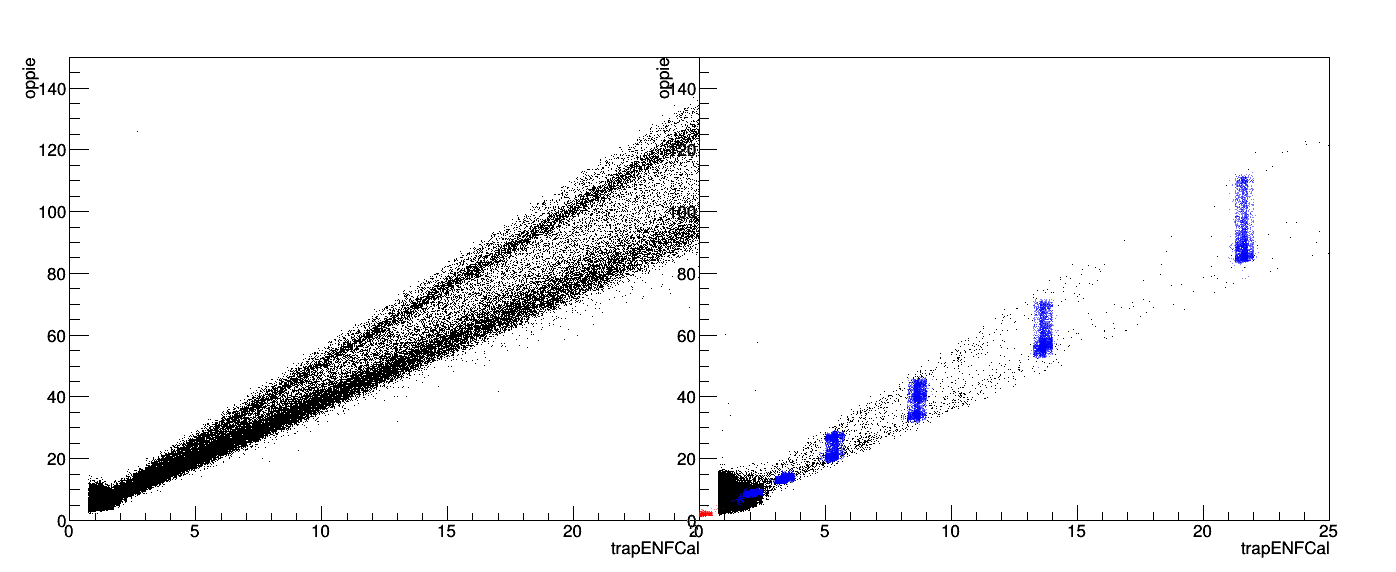

In [24]:
c1.cd(1); ROOT.gPad.SetLogy(0); c1.cd(2); ROOT.gPad.SetLogy(0)
xBins, xBinL, xBinH = 100, 0, 25
yBins, yBinL, yBinH = 10000, 0, 150
xStr, yStr = 'trapENFCal', 'oppie'
h1=ROOT.TH2D("h1","",xBins,xBinL,xBinH,yBins,yBinL,yBinH);cal.Project("h1",yStr+":"+xStr,theCut)
h2=ROOT.TH2D("h2","",xBins,xBinL,xBinH,yBins,yBinL,yBinH);bg.Project("h2",yStr+":"+xStr,theCut)
h3=ROOT.TH2D("h3","",xBins,xBinL,xBinH,yBins,yBinL,yBinH);FT.Project("h3",yStr+":"+xStr)
h4=ROOT.TH2D("h4","",xBins,xBinL,xBinH,yBins,yBinL,yBinH);Ext.Project("h4",yStr+":"+xStr,"channel == 624")
h1.GetXaxis().SetTitle(xStr); h1.GetYaxis().SetTitle(yStr)
h2.GetXaxis().SetTitle(xStr); h2.GetYaxis().SetTitle(yStr)
c1.cd(1); h1.Draw()
c1.cd(2); h2.Draw()
h3.SetMarkerColorAlpha(ROOT.kRed, 0.5); h3.Draw("SAME")
h4.SetMarkerColorAlpha(ROOT.kBlue, 0.5); h4.Draw("SAME")
c1.Draw()

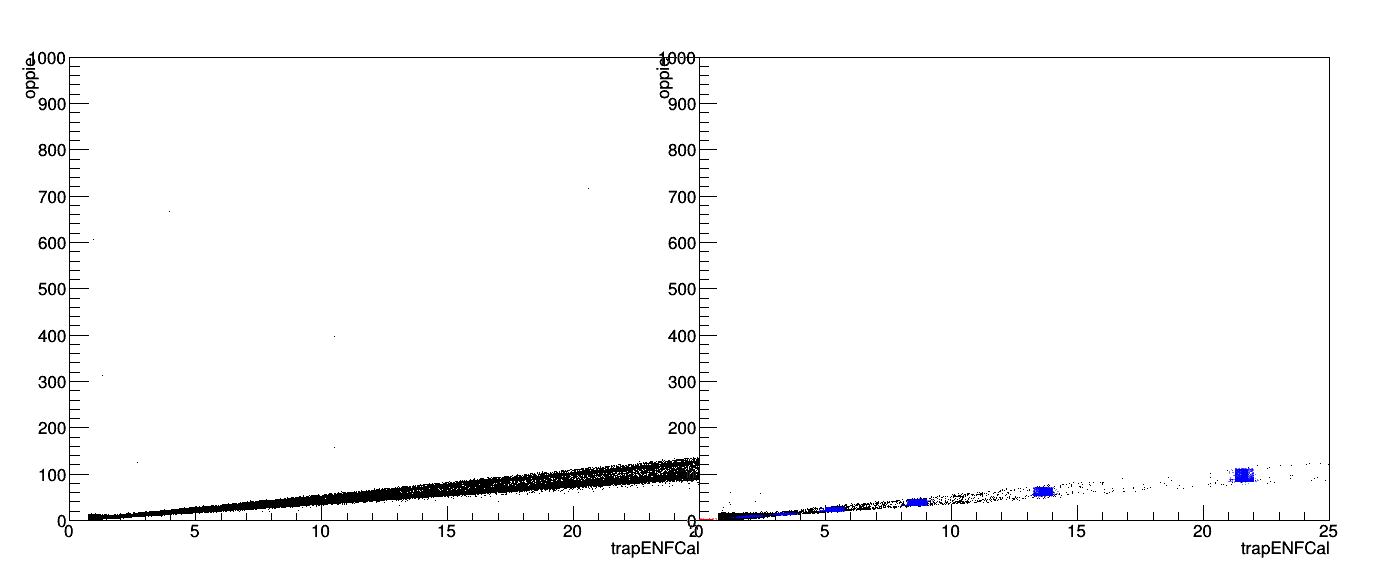

In [25]:
c1.cd(1); ROOT.gPad.SetLogy(0); c1.cd(2); ROOT.gPad.SetLogy(0)
xBins, xBinL, xBinH = 100, 0, 25
yBins, yBinL, yBinH = 100000, 0, 1000
xStr, yStr = 'trapENFCal', 'oppie'
h1=ROOT.TH2D("h1","",xBins,xBinL,xBinH,yBins,yBinL,yBinH);cal.Project("h1",yStr+":"+xStr,theCut)
h2=ROOT.TH2D("h2","",xBins,xBinL,xBinH,yBins,yBinL,yBinH);bg.Project("h2",yStr+":"+xStr,theCut)
h3=ROOT.TH2D("h3","",xBins,xBinL,xBinH,yBins,yBinL,yBinH);FT.Project("h3",yStr+":"+xStr)
h4=ROOT.TH2D("h4","",xBins,xBinL,xBinH,yBins,yBinL,yBinH);Ext.Project("h4",yStr+":"+xStr,"channel == 624")
h1.GetXaxis().SetTitle(xStr); h1.GetYaxis().SetTitle(yStr)
h2.GetXaxis().SetTitle(xStr); h2.GetYaxis().SetTitle(yStr)
c1.cd(1); h1.Draw()
c1.cd(2); h2.Draw()
h3.SetMarkerColorAlpha(ROOT.kRed, 0.5); h3.Draw("SAME")
h4.SetMarkerColorAlpha(ROOT.kBlue, 0.5); h4.Draw("SAME")
c1.Draw()

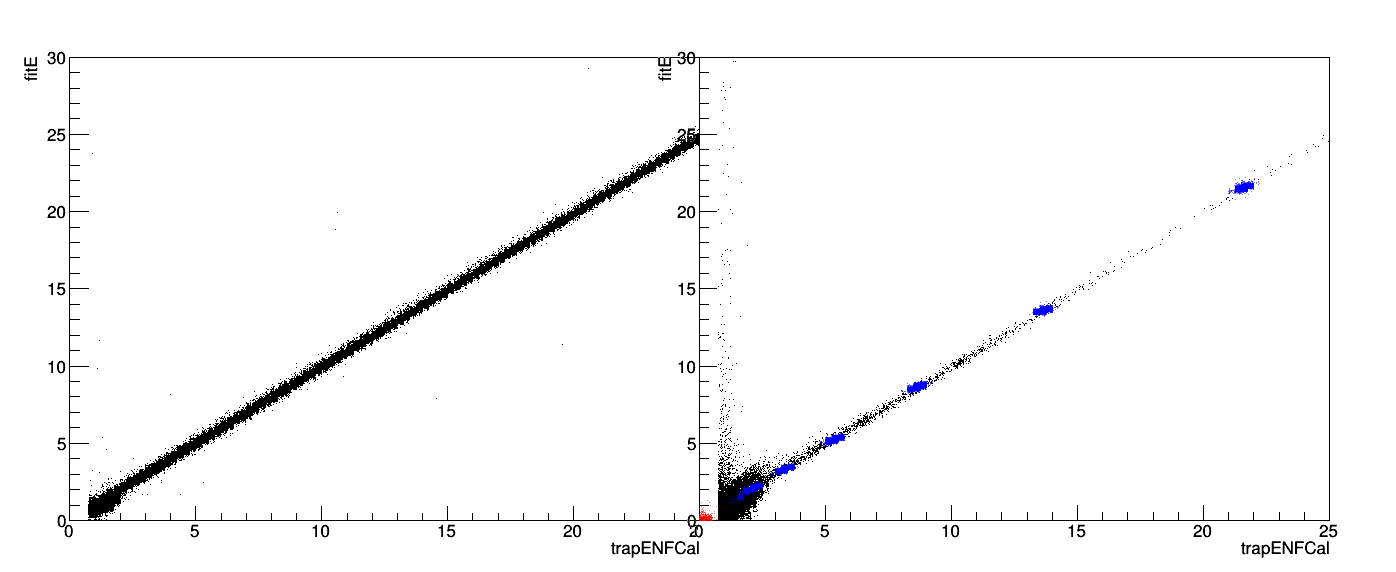

In [26]:
c1.cd(1); ROOT.gPad.SetLogy(0); c1.cd(2); ROOT.gPad.SetLogy(0)
xBins, xBinL, xBinH = 100, 0, 25
yBins, yBinL, yBinH = 10000, 0, 30
xStr, yStr = 'trapENFCal', 'fitE'
h1=ROOT.TH2D("h1","",xBins,xBinL,xBinH,yBins,yBinL,yBinH);cal.Project("h1",yStr+":"+xStr,theCut)
h2=ROOT.TH2D("h2","",xBins,xBinL,xBinH,yBins,yBinL,yBinH);bg.Project("h2",yStr+":"+xStr,theCut)
h3=ROOT.TH2D("h3","",xBins,xBinL,xBinH,yBins,yBinL,yBinH);FT.Project("h3",yStr+":"+xStr)
h4=ROOT.TH2D("h4","",xBins,xBinL,xBinH,yBins,yBinL,yBinH);Ext.Project("h4",yStr+":"+xStr,"channel == 624")
h1.GetXaxis().SetTitle(xStr); h1.GetYaxis().SetTitle(yStr)
h2.GetXaxis().SetTitle(xStr); h2.GetYaxis().SetTitle(yStr)
c1.cd(1); h1.Draw()
c1.cd(2); h2.Draw()
h3.SetMarkerColorAlpha(ROOT.kRed, 0.5); h3.Draw("SAME")
h4.SetMarkerColorAlpha(ROOT.kBlue, 0.5); h4.Draw("SAME")
c1.Draw()

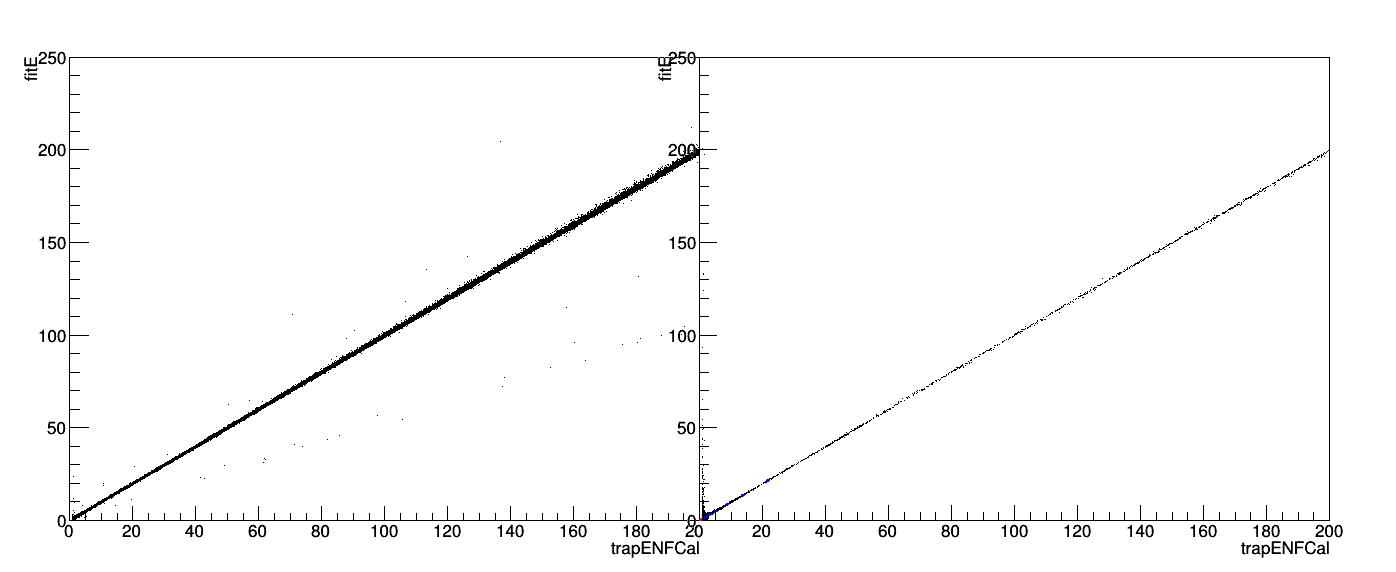

In [27]:
c1.cd(1); ROOT.gPad.SetLogy(0); c1.cd(2); ROOT.gPad.SetLogy(0)
xBins, xBinL, xBinH = 1000, 0, 200
yBins, yBinL, yBinH = 100000, 0, 250
xStr, yStr = 'trapENFCal', 'fitE'
h1=ROOT.TH2D("h1","",xBins,xBinL,xBinH,yBins,yBinL,yBinH);cal.Project("h1",yStr+":"+xStr,theCut)
h2=ROOT.TH2D("h2","",xBins,xBinL,xBinH,yBins,yBinL,yBinH);bg.Project("h2",yStr+":"+xStr,theCut)
h3=ROOT.TH2D("h3","",xBins,xBinL,xBinH,yBins,yBinL,yBinH);FT.Project("h3",yStr+":"+xStr)
h4=ROOT.TH2D("h4","",xBins,xBinL,xBinH,yBins,yBinL,yBinH);Ext.Project("h4",yStr+":"+xStr,"channel == 624")
h1.GetXaxis().SetTitle(xStr); h1.GetYaxis().SetTitle(yStr)
h2.GetXaxis().SetTitle(xStr); h2.GetYaxis().SetTitle(yStr)
c1.cd(1); h1.Draw()
c1.cd(2); h2.Draw()
h3.SetMarkerColorAlpha(ROOT.kRed, 0.5); h3.Draw("SAME")
h4.SetMarkerColorAlpha(ROOT.kBlue, 0.5); h4.Draw("SAME")
c1.Draw()

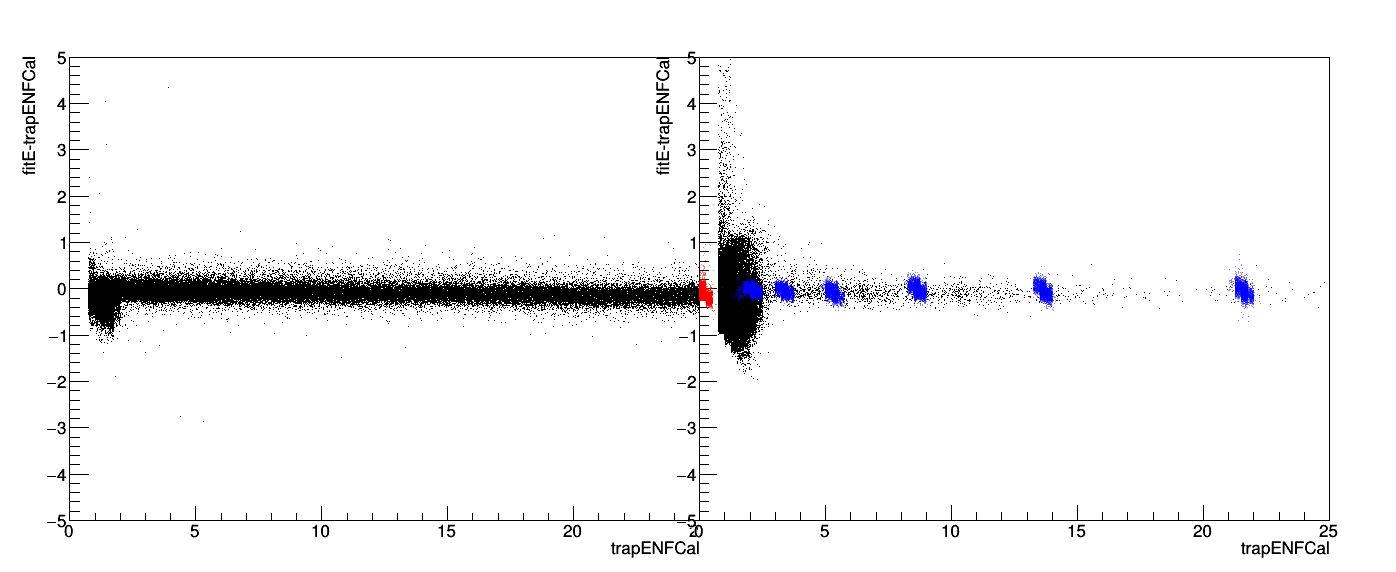

In [28]:
c1.cd(1); ROOT.gPad.SetLogy(0); c1.cd(2); ROOT.gPad.SetLogy(0)
xBins, xBinL, xBinH = 100, 0, 25
yBins, yBinL, yBinH = 10000, -5, 5
xStr, yStr = 'trapENFCal', 'fitE-trapENFCal'
h1=ROOT.TH2D("h1","",xBins,xBinL,xBinH,yBins,yBinL,yBinH);cal.Project("h1",yStr+":"+xStr,theCut)
h2=ROOT.TH2D("h2","",xBins,xBinL,xBinH,yBins,yBinL,yBinH);bg.Project("h2",yStr+":"+xStr,theCut)
h3=ROOT.TH2D("h3","",xBins,xBinL,xBinH,yBins,yBinL,yBinH);FT.Project("h3",yStr+":"+xStr)
h4=ROOT.TH2D("h4","",xBins,xBinL,xBinH,yBins,yBinL,yBinH);Ext.Project("h4",yStr+":"+xStr,"channel == 624")
h1.GetXaxis().SetTitle(xStr); h1.GetYaxis().SetTitle(yStr)
h2.GetXaxis().SetTitle(xStr); h2.GetYaxis().SetTitle(yStr)
c1.cd(1); h1.Draw()
c1.cd(2); h2.Draw()
h3.SetMarkerColorAlpha(ROOT.kRed, 0.5); h3.Draw("SAME")
h4.SetMarkerColorAlpha(ROOT.kBlue, 0.5); h4.Draw("SAME")
c1.Draw()

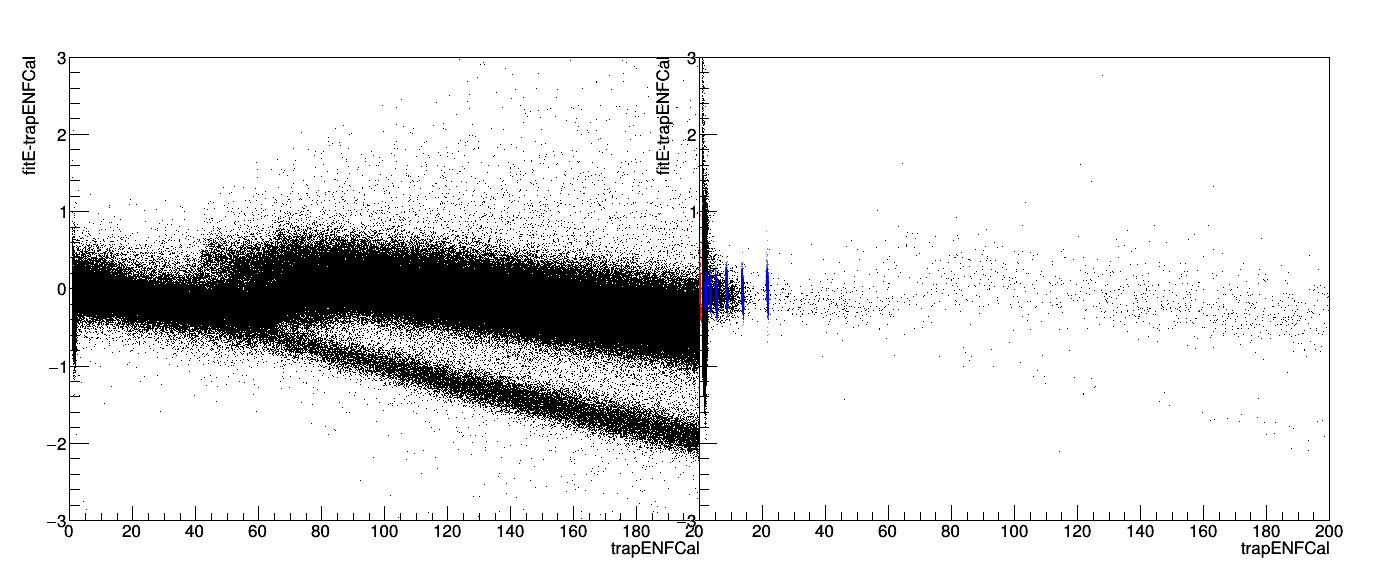

In [29]:
c1.cd(1); ROOT.gPad.SetLogy(0); c1.cd(2); ROOT.gPad.SetLogy(0)
xBins, xBinL, xBinH = 1000, 0, 200
yBins, yBinL, yBinH = 10000, -3, 3
xStr, yStr = 'trapENFCal', 'fitE-trapENFCal'
h1=ROOT.TH2D("h1","",xBins,xBinL,xBinH,yBins,yBinL,yBinH);cal.Project("h1",yStr+":"+xStr,theCut)
h2=ROOT.TH2D("h2","",xBins,xBinL,xBinH,yBins,yBinL,yBinH);bg.Project("h2",yStr+":"+xStr,theCut)
h3=ROOT.TH2D("h3","",xBins,xBinL,xBinH,yBins,yBinL,yBinH);FT.Project("h3",yStr+":"+xStr)
h4=ROOT.TH2D("h4","",xBins,xBinL,xBinH,yBins,yBinL,yBinH);Ext.Project("h4",yStr+":"+xStr,"channel == 624")
h1.GetXaxis().SetTitle(xStr); h1.GetYaxis().SetTitle(yStr)
h2.GetXaxis().SetTitle(xStr); h2.GetYaxis().SetTitle(yStr)
c1.cd(1); h1.Draw()
c1.cd(2); h2.Draw()
h3.SetMarkerColorAlpha(ROOT.kRed, 0.5); h3.Draw("SAME")
h4.SetMarkerColorAlpha(ROOT.kBlue, 0.5); h4.Draw("SAME")
c1.Draw()

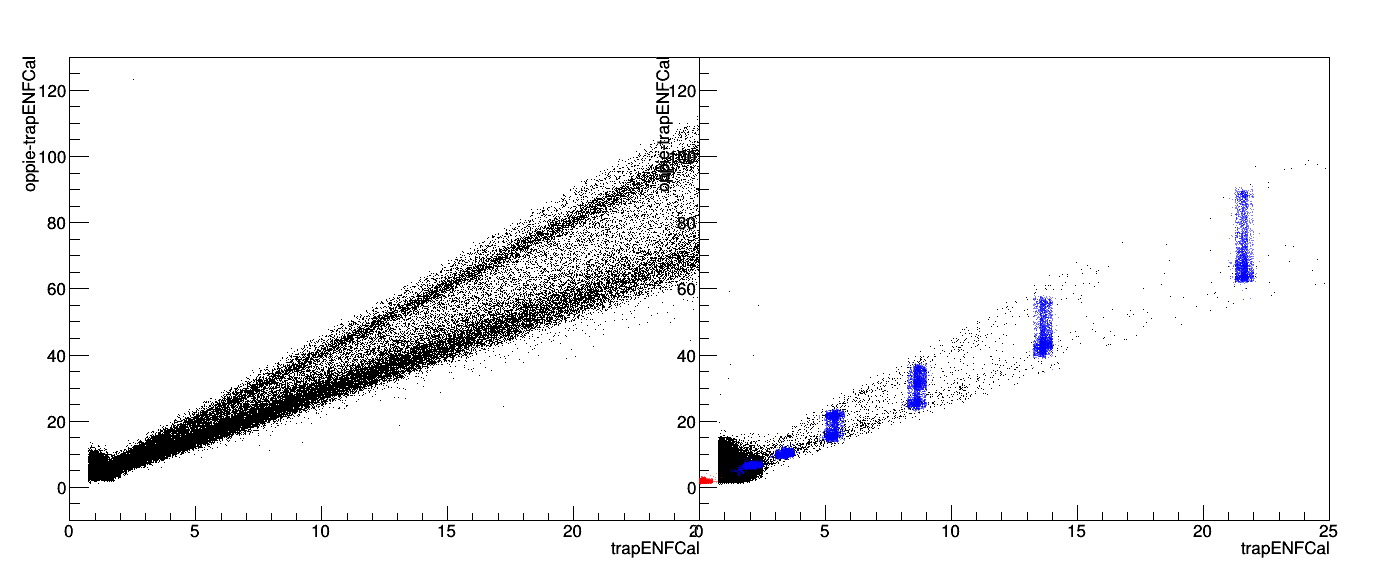

In [30]:
c1.cd(1); ROOT.gPad.SetLogy(0); c1.cd(2); ROOT.gPad.SetLogy(0)
xBins, xBinL, xBinH = 100, 0, 25
yBins, yBinL, yBinH = 10000, -10, 130
xStr, yStr = 'trapENFCal', 'oppie-trapENFCal'
h1=ROOT.TH2D("h1","",xBins,xBinL,xBinH,yBins,yBinL,yBinH);cal.Project("h1",yStr+":"+xStr,theCut)
h2=ROOT.TH2D("h2","",xBins,xBinL,xBinH,yBins,yBinL,yBinH);bg.Project("h2",yStr+":"+xStr,theCut)
h3=ROOT.TH2D("h3","",xBins,xBinL,xBinH,yBins,yBinL,yBinH);FT.Project("h3",yStr+":"+xStr)
h4=ROOT.TH2D("h4","",xBins,xBinL,xBinH,yBins,yBinL,yBinH);Ext.Project("h4",yStr+":"+xStr,"channel == 624")
h1.GetXaxis().SetTitle(xStr); h1.GetYaxis().SetTitle(yStr)
h2.GetXaxis().SetTitle(xStr); h2.GetYaxis().SetTitle(yStr)
c1.cd(1); h1.Draw()
c1.cd(2); h2.Draw()
h3.SetMarkerColorAlpha(ROOT.kRed, 0.5); h3.Draw("SAME")
h4.SetMarkerColorAlpha(ROOT.kBlue, 0.5); h4.Draw("SAME")
c1.Draw()